# Stochastic Growth and Long-Run Risk

## Overview

__This notebook displays three models and solutions with capital and endogenously determined long-run risk.  The models are considered in each of the three sections of this notebook and include:__

__1. Adjustment cost__

__2. Permanent income__

__3. Habit persistance__

__The first is an AK model with adjustment costs inspired in part by Eberly and Wong but includes a persistence process for technology.  The second is a version of Friedman's permanent income model, and the third one extends this to include habit persistence preferences motivated by the work of Hansen, Sargent Tallarini.__

## Section 1: Adjustment Cost

We consider a so-called $AK$ model with adjustment costs and state dependent growth. 

### Section 1.1: Model Specification

 - Discrete-time utility recursion:
\begin{align*}
V_t & = \left( \left[1 - \exp(-\delta)\right] (C_t)^{1-\rho} + \exp(-\delta) \left[ {\mathcal R}\left( V_{t+1} \mid {\frak F}_t \right) \right]^{1-\rho} \right)^{\frac 1 {1-\rho}} \cr
 {\mathcal R}\left( V_{t+1} \mid {\frak F}_t \right) & = \left(E\left[ \left( V_{t+1} \right)^{1 - \gamma} \mid {\frak F}_t \right] \right)^{\frac 1 {1-\gamma}}
\end{align*}


where ${\frac 1 \rho}$ is the intertemporal elasticity of substitution, $\gamma$ is a risk aversion parameter and $\delta$ is the subjective rate of discount.  Moreover, $C_t$ is consumption, $V_t$ is the continuation value, and ${\mathfrak F}_t$ is the current period consumer/investor information.  



 - Marginal utility processes:  
\begin{align*}
MC_t & = [(1 - \exp(-\delta) ] (C_t)^{-\rho} (V_t)^\rho  \cr
MR_t & = \exp(-\delta) (R_t)^{-\rho} (V_t)^{\rho}  
\end{align*}
where $R_t \equiv {\mathcal R}\left( V_{t+1} \mid {\frak F}_t \right)$.  





 - Discrete-time state evolution:
\begin{align*}
K_{t+1}  &= K_t\left[1 + \phi_2 \left({\frac {I_t} {K_t}}\right) \right]^{\phi_1} G_{t+1} \cr
G_{t+1} & \equiv \exp \left( - \alpha_k + Z_{t+1} - {\frac 1 2} \mid \sigma_k \mid^2  + \sigma_k\cdot W_{t+1} \right) \cr
C_t + I_t & = {\mathbb A} K_t \cr
 Z_{t+1} &= \exp(-\beta_z) Z_t + \sigma_z \cdot W_{t+1}
 \end{align*}
 
 
where $W_{t+1}$ is distributed as a bivariate standard normal. Consolidating the first-order conditions for investment and consumption gives:

\begin{equation*}
\phi_1 \phi_2 \left[1 + \phi_2 \left(\frac{I_t}{K_t}\right) \right]^{\phi_1 - 1}  = [\exp(\delta) - 1 ] \left[1 + \phi_2 \left({\frac {I_t} {K_t}}\right) \right]^{\phi_1} \left({\frac {C_t}{K_t}}\right)^{-\rho} \left({\frac {R_t}{K_t}}\right)^{\rho  - 1} 
\end{equation*}


which can be solved for either ${\frac {C_t} {K_t}}$ or ${\frac {I_t}{K_t}}$ after substituting from the equation 
${\mathbb A} = {\frac {C_t}{K_t}} + {\frac {I_t}{K_t}}$.  

We solve the model using first-order small noise approximation.  We check the solution against a more general nonlinear method and verify the quality of the approximation. 

## Section 2: Calculations

### Section 2.0: Setup

In [1]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from model_code import solve_model
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
def plot_impulse(rhos, gamma, betaz, T, shock = 1, empirical_method = 1, 
                 transform_shocks = False, title = None):
    """
    Given a set of parameters, computes and displays the impulse responses of
    consumption, capital, the consumption-investment ratio, along with the
    shock price elacticities.
    
    Input
    ==========
    Note that the values of delta, phi, A, and a_k are only used for the
    empirical_method = 0 specification (see below). 
    
    rhos:               The set of rho values for which to plot the IRFs.
    gamma:              The risk aversion of the model.
    betaz:               Shock persistence.
    T:                  Number of periods to plot.
    shock:              (1 or 2) Defines which of the two possible shocks to plot.

    transform_shocks:   True or False. True to make the rho = 1 response to 
                        shock 2 be transitory.
    title:              Title for the image plotted.
    """
    
    fig = plt.figure(figsize=(20, 30))
    
    smin = 0
    smax = 0
    kmin = 0
    kmax = 0
    cmin = 0
    cmax = 0
    dmin = 0
    dmax = 0
    
    for i, r in enumerate(rhos):

        S, K, C, I = solve_model(r, gamma, betaz, T, empirical = empirical_method, 
                                 transform = transform_shocks, shock = shock, verbose = False)[2]

        plt.subplot(4, 1, 1)
        plt.tick_params(labelsize = 15)
        plt.plot(S, label=r"$\rho={}$".format(r), lw=3)
        smin = min(smin, np.min(S) * 1.2)
        smax = max(smax, np.max(S) * 1.2)
        if i == len(rhos) - 1:
            plt.ylabel("Price Elasticity", fontsize = 25)
            plt.legend(loc='lower right', prop={'size': 20})
            plt.ylim([smin, smax])

        plt.subplot(4, 1, 2)
        plt.tick_params(labelsize = 15)
        plt.plot(100*K, label=r"$\rho={}$".format(r), lw=3)
        kmin = min(kmin, np.min(K) * 120)
        kmax = max(kmax, np.max(K) * 120)
        if i == len(rhos) - 1:
            plt.ylabel("Capital", fontsize = 25)
            plt.legend(loc='lower right', prop={'size': 20})
            plt.ylim([kmin, kmax])

        plt.subplot(4, 1, 3)
        plt.tick_params(labelsize = 15)
        plt.plot(100 * C, label=r"$\rho={}$".format(r), lw=3)
        cmin = min(cmin, np.min(C) * 120)
        cmax = max(cmax, np.max(C) * 120)
        if i == len(rhos) - 1:
            plt.ylabel("Consumption", fontsize = 25)
            plt.legend(loc='lower right', prop={'size': 20})
            plt.ylim([cmin, cmax])

        plt.subplot(4, 1, 4)
        plt.tick_params(labelsize = 15)
        plt.plot(100 * (C - I), label=r"$\rho={}$".format(r), lw=3)
        dmin = min(dmin, np.min(C - I) * 120)
        dmax = max(dmax, np.max(C - I) * 120)
        if i == len(rhos) - 1:
            plt.ylabel("Consumption-Investment Ratio", fontsize = 25)
            plt.legend(loc='lower right', prop={'size': 20})
            plt.ylim([dmin, dmax])
            plt.xlabel("Time (quarters)", fontsize = 25)

    plt.suptitle(title, fontsize = 30)
    plt.tight_layout(rect=[0, 0, 1, 0.97]) # Allow for padding on the suptitle

    plt.show()

### Section 2.1.1: First Calibration (Eberly and Wang) - High Risk Aversion

Our calculations use the following quarterly parameter values:
\begin{align*}  
& \begin{matrix}
{ \mathbb{A}}  &= & 0.036 &  & { \phi_2} & = & 400.0 &  & { \beta_z} & = & 0.014  \cr
{ \alpha}_k  &= & 0.025 &  & { \phi_1} & = & 0.0125 &  & { \delta} & = & 0.005\end{matrix}
& \sigma =\begin{bmatrix}
(\sigma_k)' \cr (\sigma_z)' \end{bmatrix}  =    \begin{bmatrix} .477  & 0 \cr  .011 & .025 \end{bmatrix}
\end{align*}

The quantities computed with these numbers will be in percentage terms (100 times log differences).  

Use the order zero relations to pin down steady states:
\begin{align*} 
\exp( k^0) & = \left[ 1 + \phi_2 \left( {\mathbb A} - \exp \left( c^0 \right) \right) \right]^{\phi_1} \exp(  -\alpha_k )
\label{calibration1}  \\
\exp( v^0 (1 - \rho)) & = (1 - \exp(-\delta))\exp(c^0(1 - \rho)) - \exp(-\delta + (v^0 + k^0)(1 - \rho)) \\
\phi_1 \phi_2 \left[ 1 + \phi_2 \left( {\mathbb A} - \exp \left( c^0 \right) \right) \right]^{\phi_1} & = \exp(-\rho c^0 + (\rho - 1)(v^0 + k^0))(\exp(\delta)-1)\left[ 1 + \phi_2 \left( {\mathbb A} - \exp \left( c^0 \right) \right) \right]^{\phi_1}
\end{align*}


This set of parameters implies a quarterly growth rate of 0.48%. We consider $\rho = .5, 1, 2$.

In [3]:
# Define some reasonable parameter sets.
ρs = [.5, 1, 2]
γ = 10
βz = 0.014
T = 200

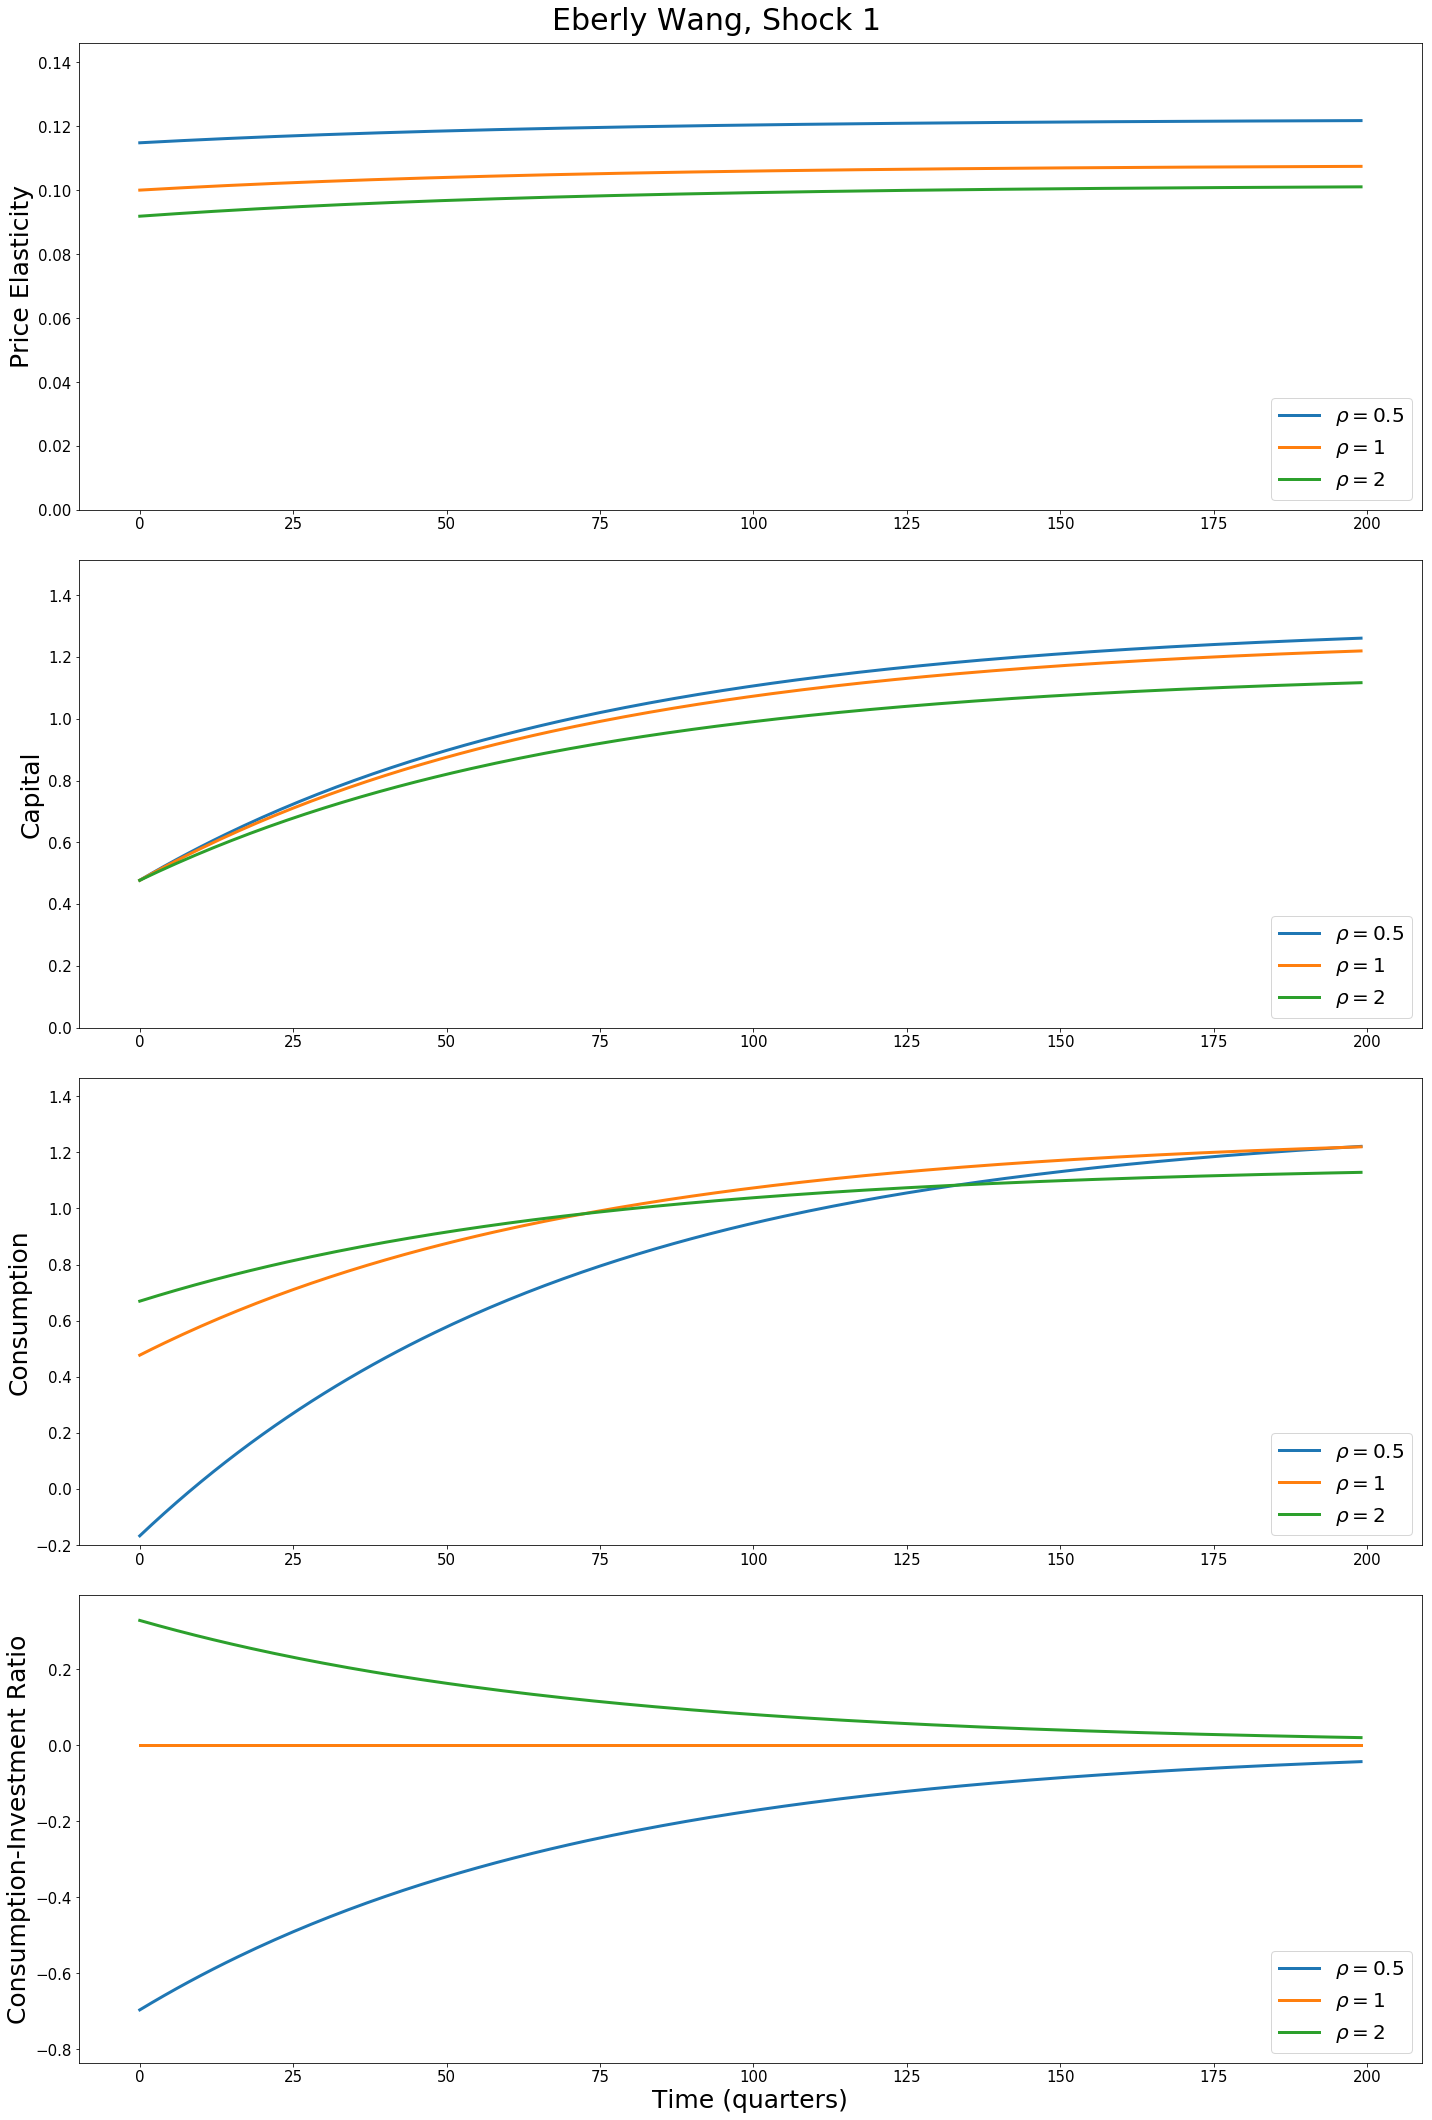

In [4]:
plot_impulse(ρs, γ, βz, T, shock = 1, empirical_method = 0, 
             transform_shocks = False, title = "Eberly Wang, Shock 1")

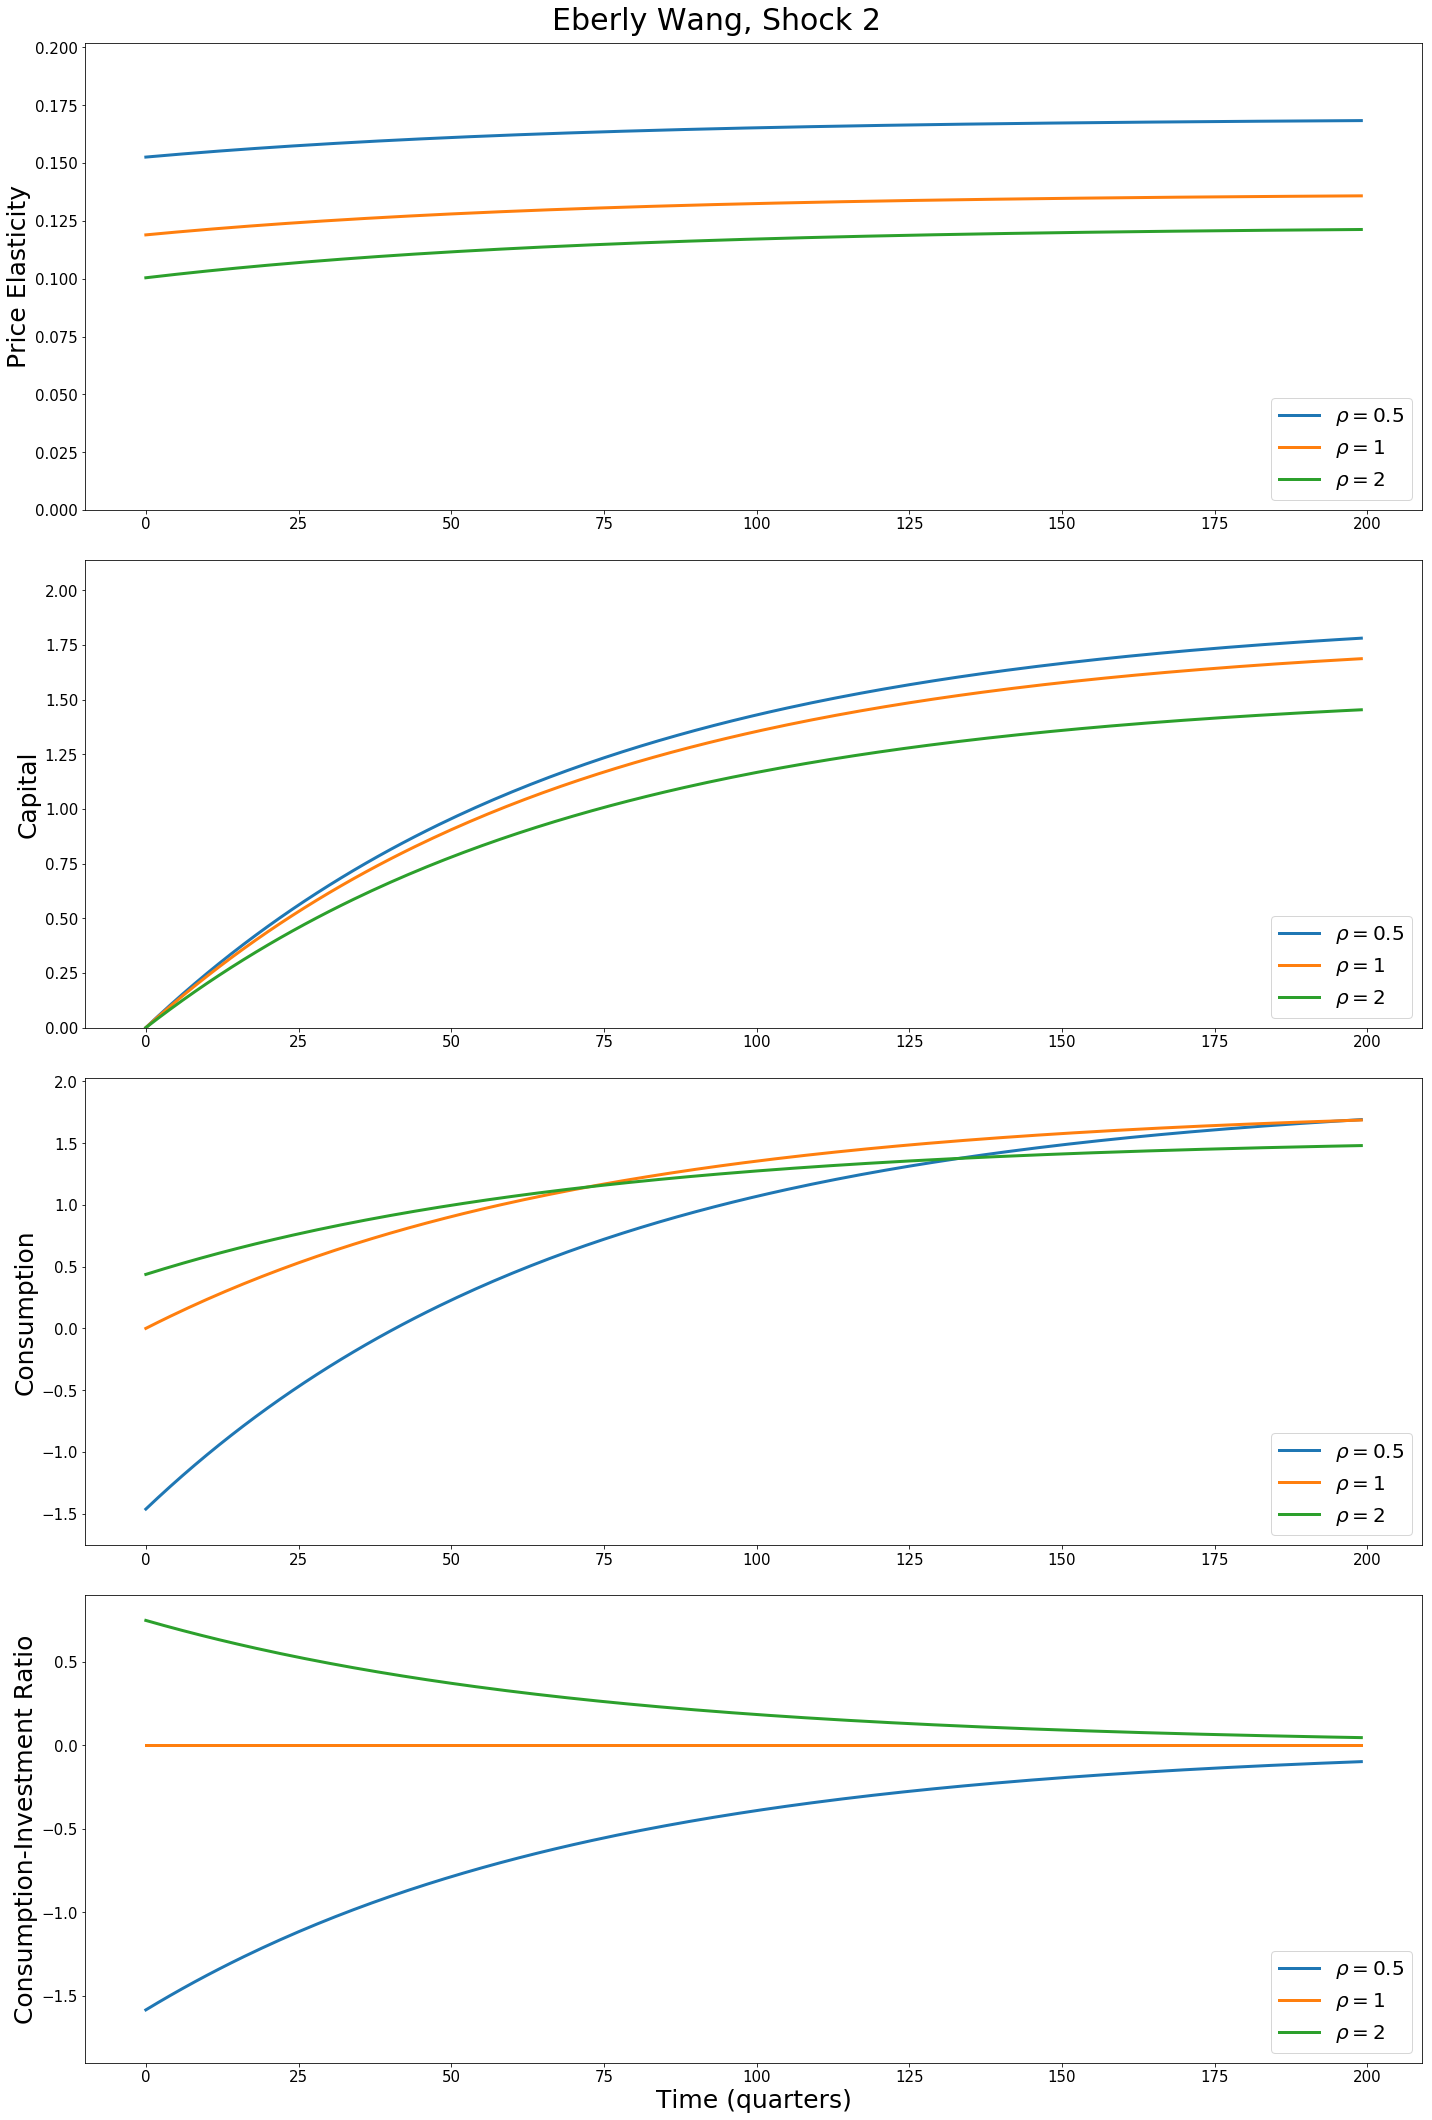

In [5]:
plot_impulse(ρs, γ, βz, T, shock = 2, empirical_method = 0, 
             transform_shocks = False, title = "Eberly Wang, Shock 2")

### Section 2.1.2: Permanent and Transitory Shocks

In the previous calculations, both shocks have permanent consequences.  We now repeat these same exercises with an observationally equivalent shock configuration for which the first shock is permanent and the second one is transitory under the $\rho = 1$ specification.  Recall that for $\rho=1$ the consumption-captial and investment capital ratios are constant.  To implement this, we alter $\sigma$ as following:


\begin{equation*}  
\sigma =\begin{bmatrix}
(\sigma_k)' \cr (\sigma_z)' \end{bmatrix}  =    \begin{bmatrix} .289  & .379 \cr  .027 & - .0064 \end{bmatrix}
\end{equation*}



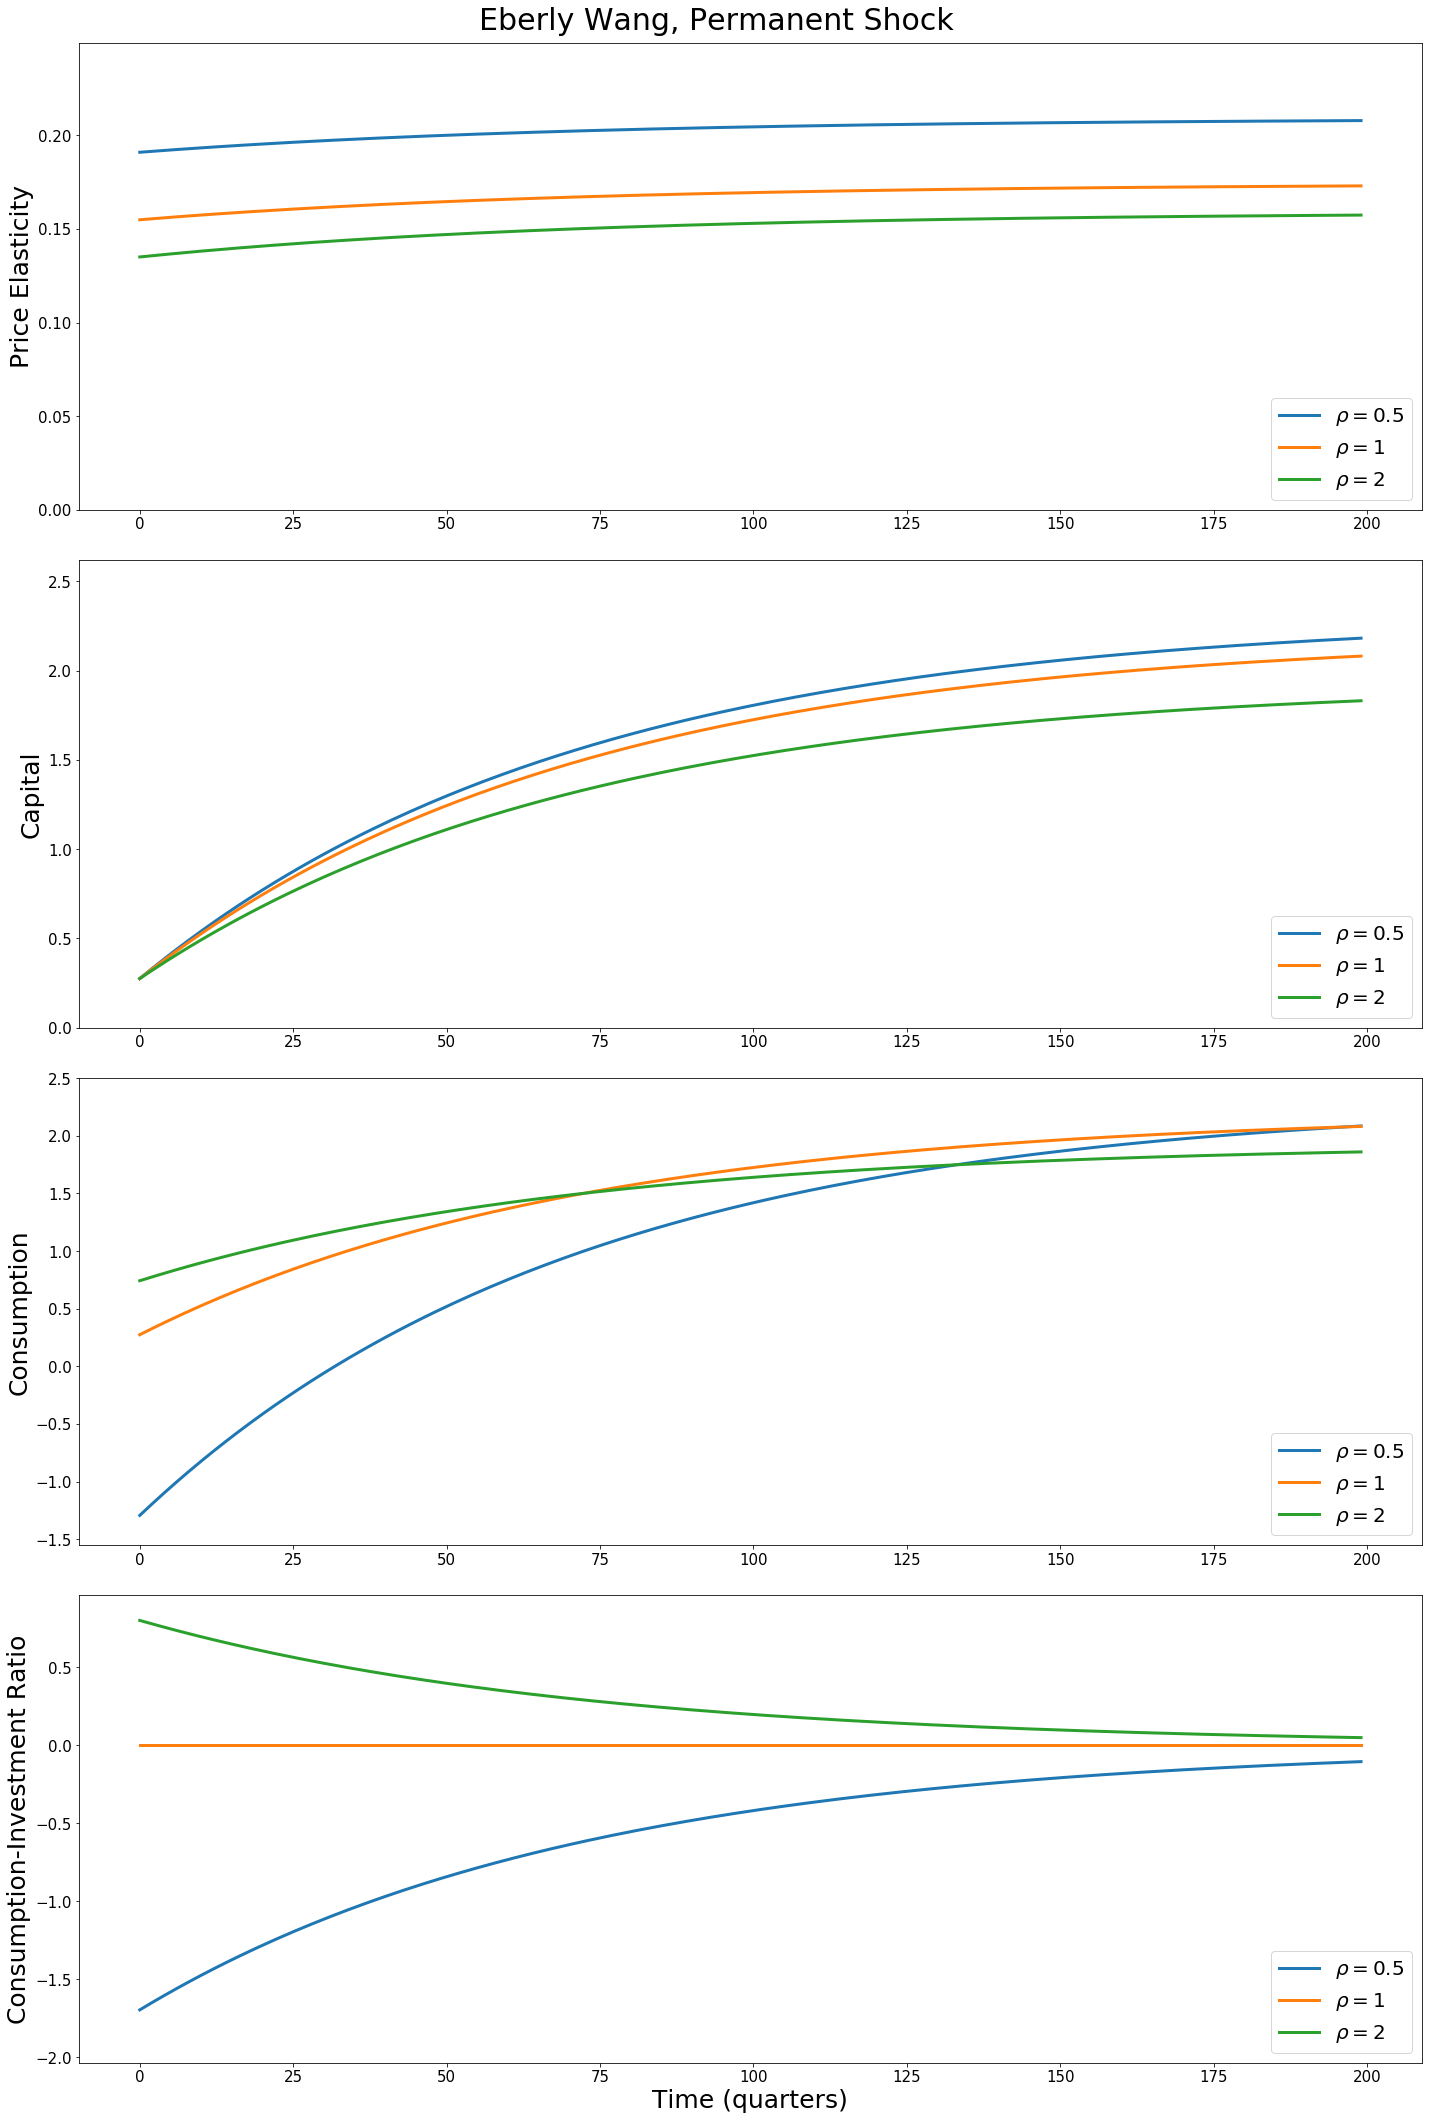

In [6]:
plot_impulse(ρs, γ, βz, T, shock = 1, empirical_method = 0, 
             transform_shocks = True, title = "Eberly Wang, Permanent Shock")

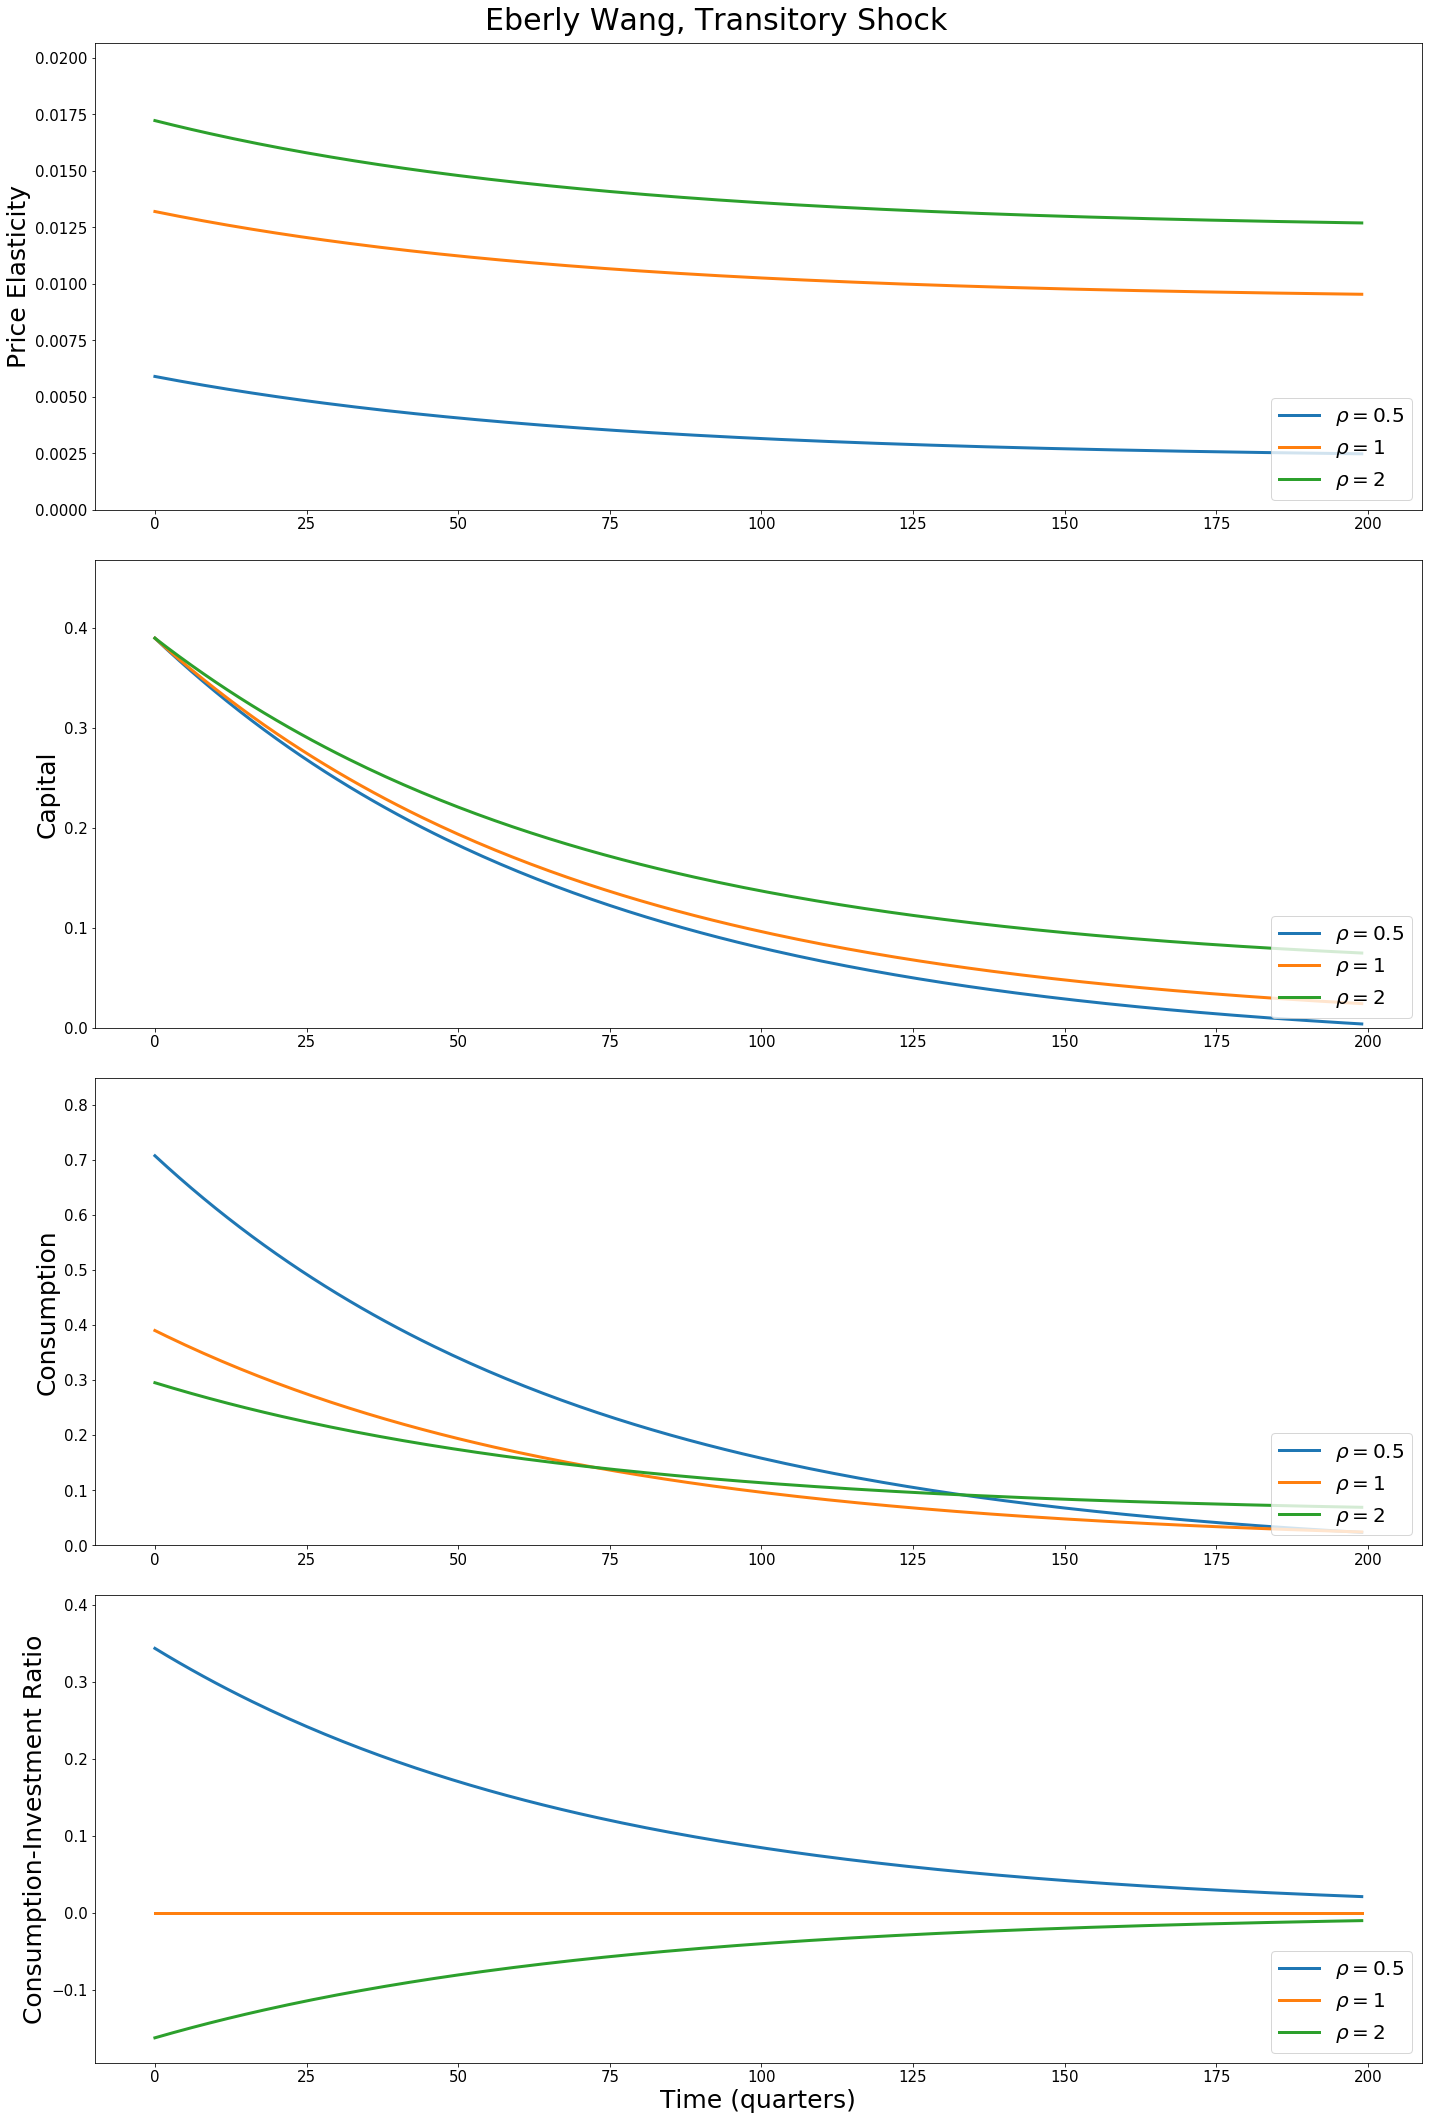

In [7]:
plot_impulse(ρs, γ, βz, T, shock = 2, empirical_method = 0, 
             transform_shocks = True, title = "Eberly Wang, Transitory Shock")

### Section 2.2.1: Second Calibration (Hansen, Khorrami, Tourre) - High Risk Aversion

Our calculations use the following quarterly parameter values:
\begin{align*}  
& \begin{matrix}
{ \mathbb{A}}  &= & 0.035 &  & { \phi_2} & = & 12.0 &  & { \beta_z} & = & 0.014  \cr
{ \alpha}_k  &= & 0.0125 &  & { \phi_1} & = & \frac{1}{12} &  & { \delta} & = & 0.0125\end{matrix}
& \sigma =\begin{bmatrix}
(\sigma_k)' \cr (\sigma_z)' \end{bmatrix}  =    \begin{bmatrix} .477  & 0 \cr  .011 & .025 \end{bmatrix}
\end{align*}

The quantities computed with these numbers will be in percentage terms (100 times log differences).  

Use the order zero relations to pin down steady states:
\begin{align*} 
\exp( k^0) & = \left[ 1 + \phi_2 \left( {\mathbb A} - \exp \left( c^0 \right) \right) \right]^{\phi_1} \exp(  -\alpha_k )
\label{calibration1}  \\
\exp( v^0 (1 - \rho)) & = (1 - \exp(-\delta))\exp(c^0(1 - \rho)) - \exp(-\delta + (v^0 + k^0)(1 - \rho)) \\
\phi_1 \phi_2 \left[ 1 + \phi_2 \left( {\mathbb A} - \exp \left( c^0 \right) \right) \right]^{\phi_1} & = \exp(-\rho c^0 + (\rho - 1)(v^0 + k^0))(\exp(\delta)-1)\left[ 1 + \phi_2 \left( {\mathbb A} - \exp \left( c^0 \right) \right) \right]^{\phi_1}
\end{align*}


This set of parameters implies a quarterly growth rate of 0.5%. We consider $\rho = .5, 1, 2$.

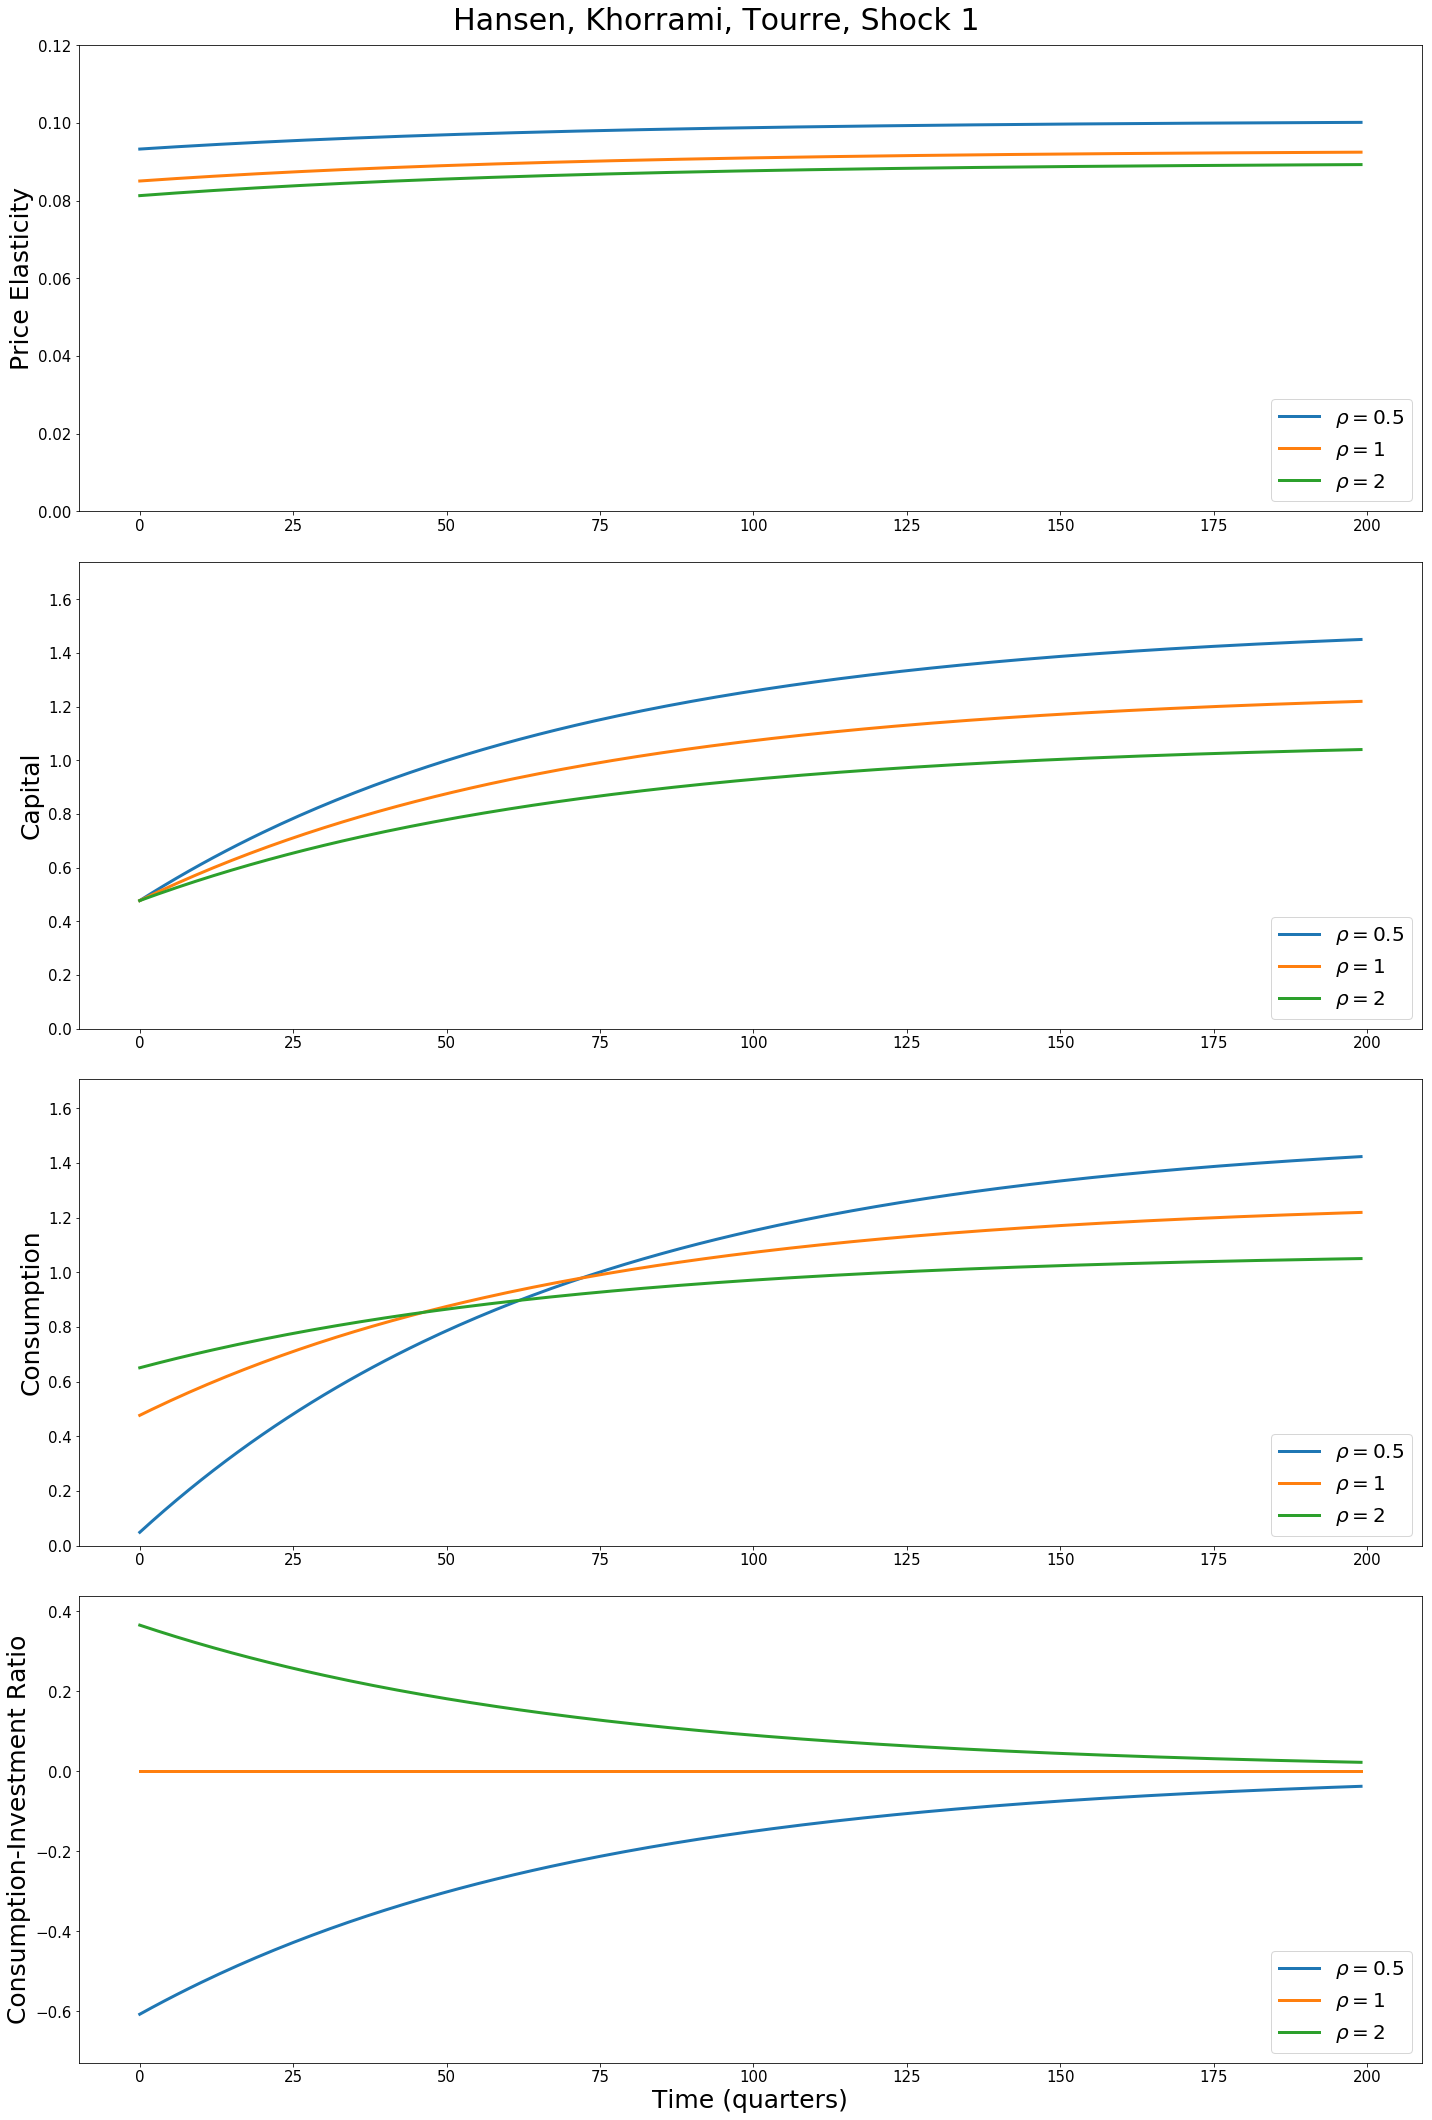

In [8]:
plot_impulse(ρs, γ, βz, T, shock = 1, empirical_method = 0.5, 
             transform_shocks = False, title = "Hansen, Khorrami, Tourre, Shock 1")

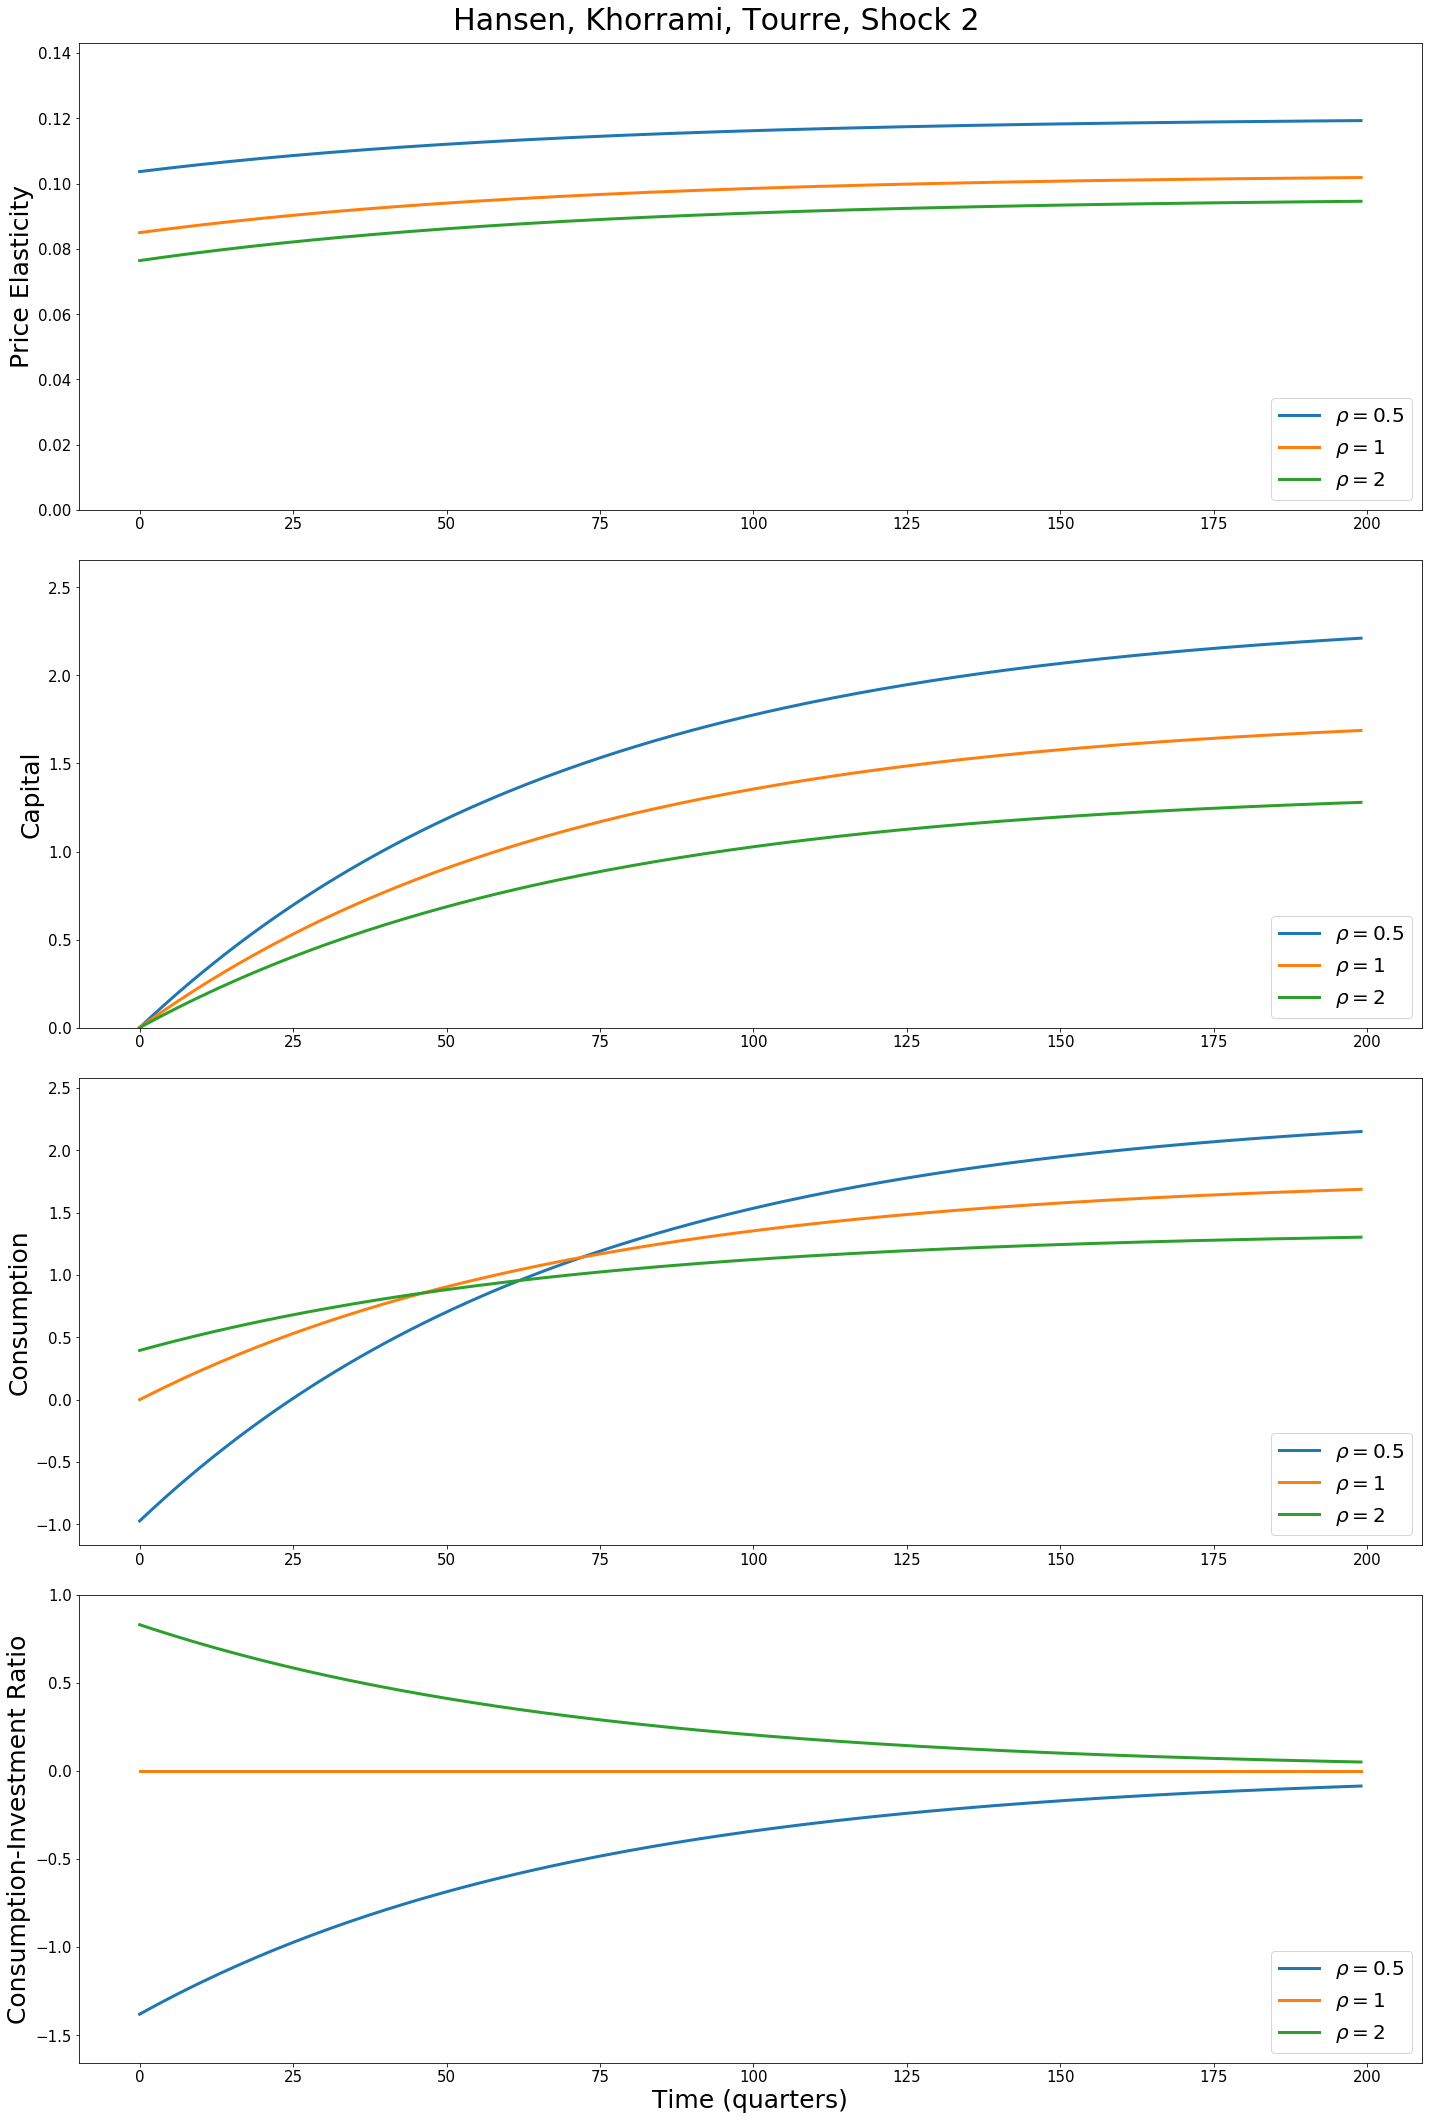

In [9]:
plot_impulse(ρs, γ, βz, T, shock = 2, empirical_method = 0.5, 
             transform_shocks = False, title = "Hansen, Khorrami, Tourre, Shock 2")

### Section 2.2.2: Permanent and Transitory Shocks

In the previous calculations, both shocks have permanent consequences.  We now repeat these same exercises with an observationally equivalent shock configuration for which the first shock is permanent and the second one is transitory under the $\rho = 1$ specification.  Recall that for $\rho=1$ the consumption-captial and investment capital ratios are constant.  To implement this, we alter $\sigma$ as following:


\begin{equation*}  
\sigma =\begin{bmatrix}
(\sigma_k)' \cr (\sigma_z)' \end{bmatrix}  =    \begin{bmatrix} .289  & .379 \cr  .027 & - .0064 \end{bmatrix}
\end{equation*}



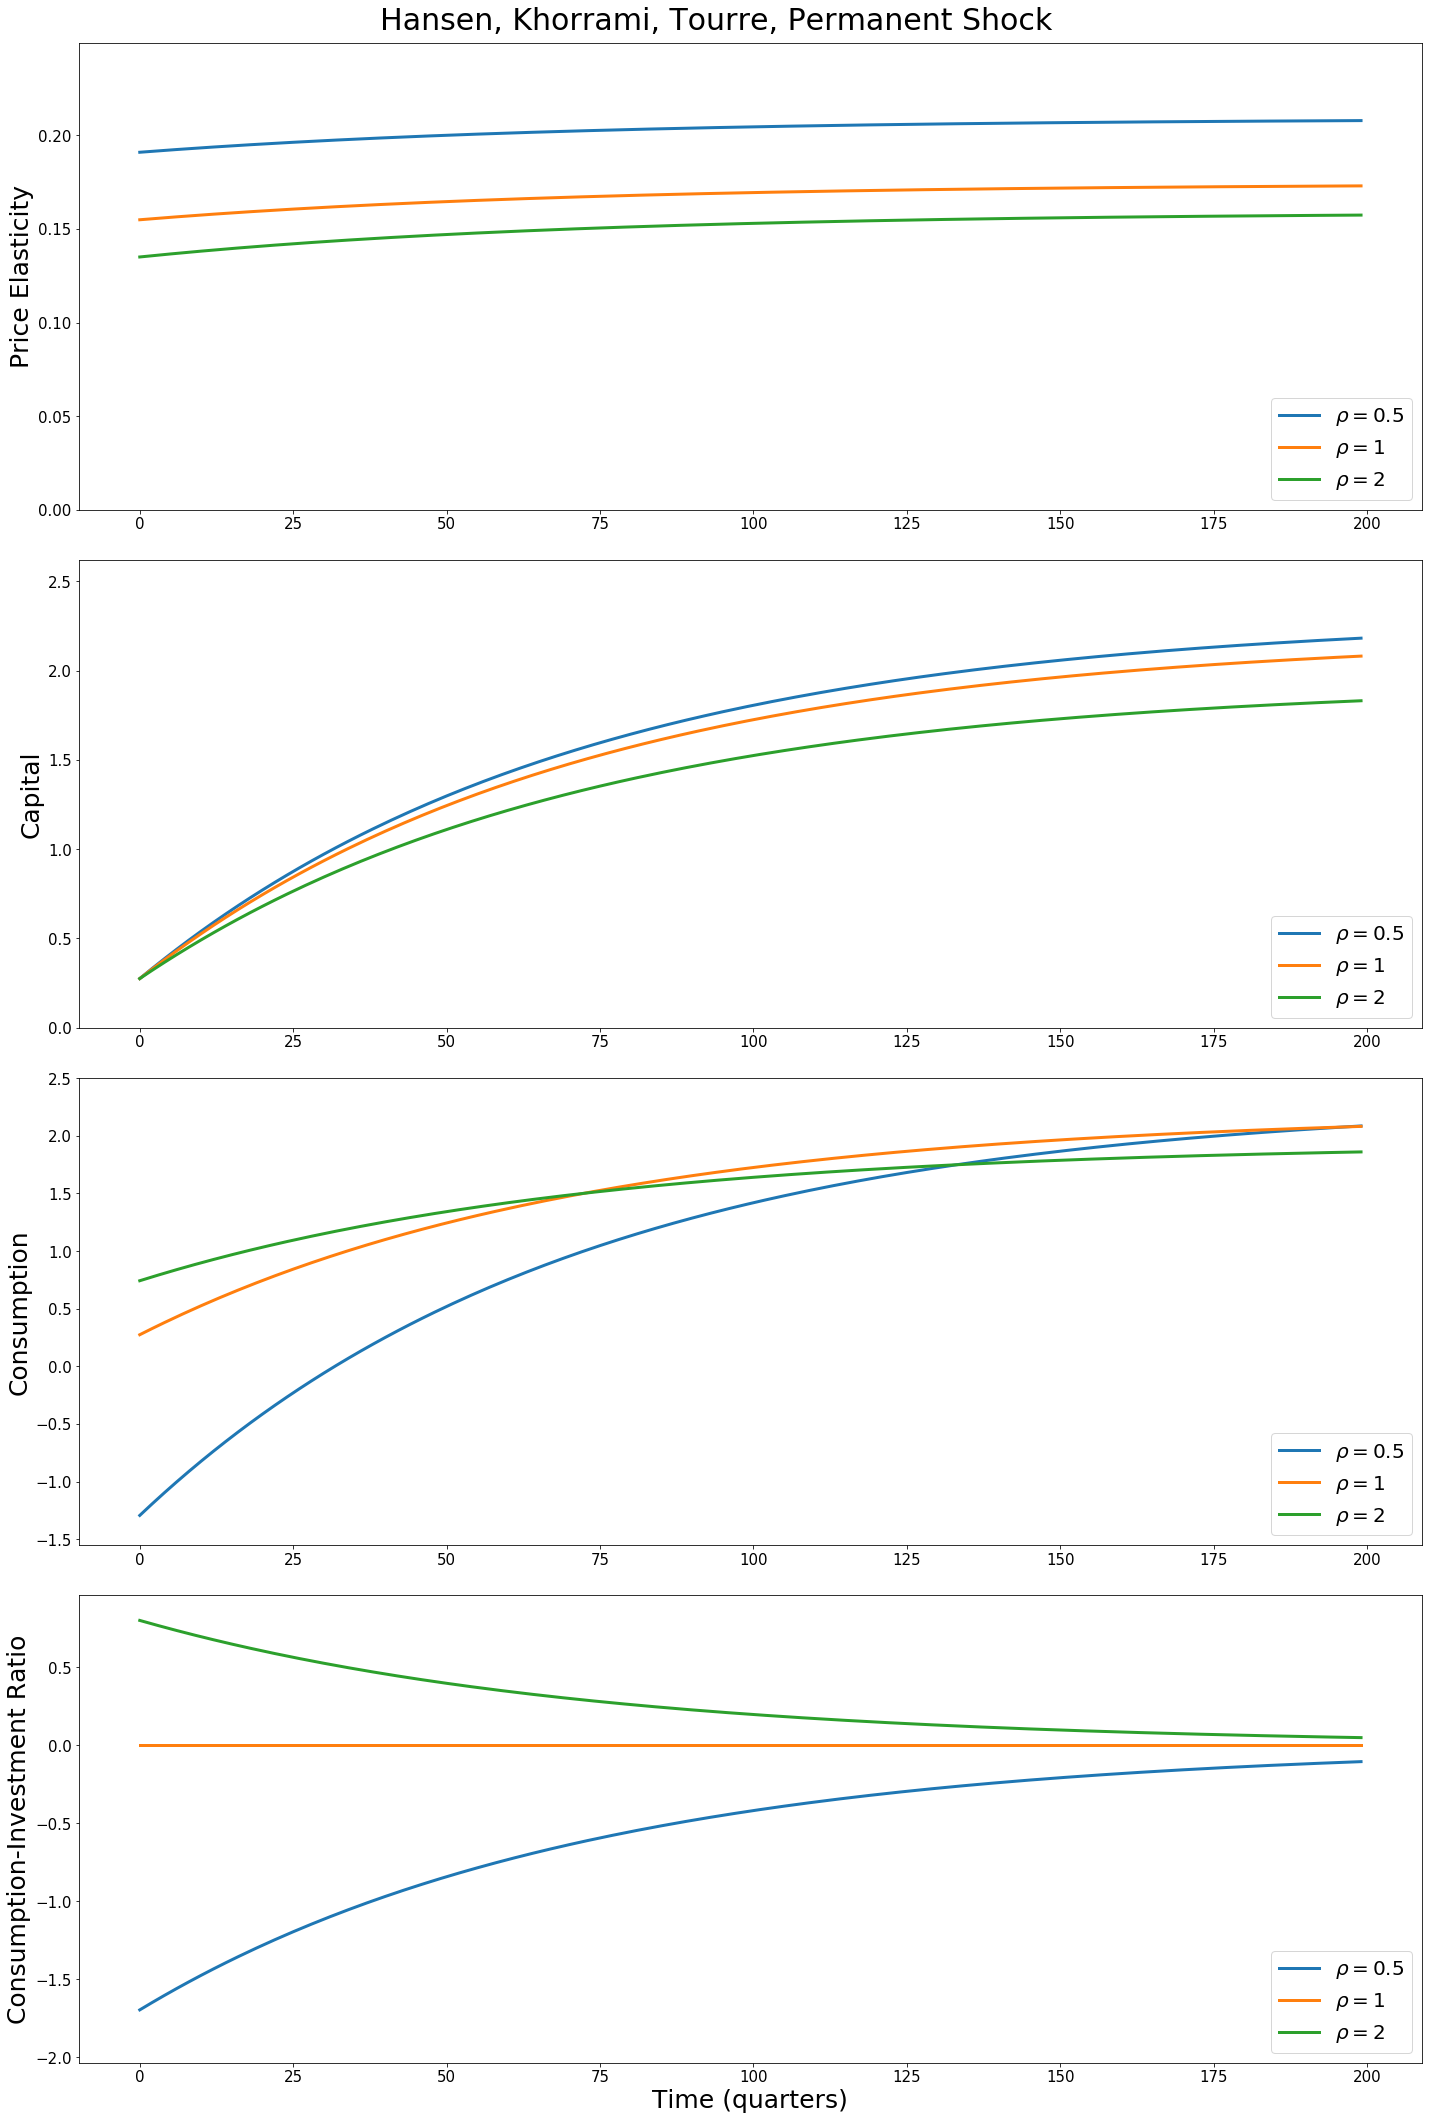

In [10]:
plot_impulse(ρs, γ, βz, T, shock = 1, empirical_method = 0, 
             transform_shocks = True, title = "Hansen, Khorrami, Tourre, Permanent Shock")

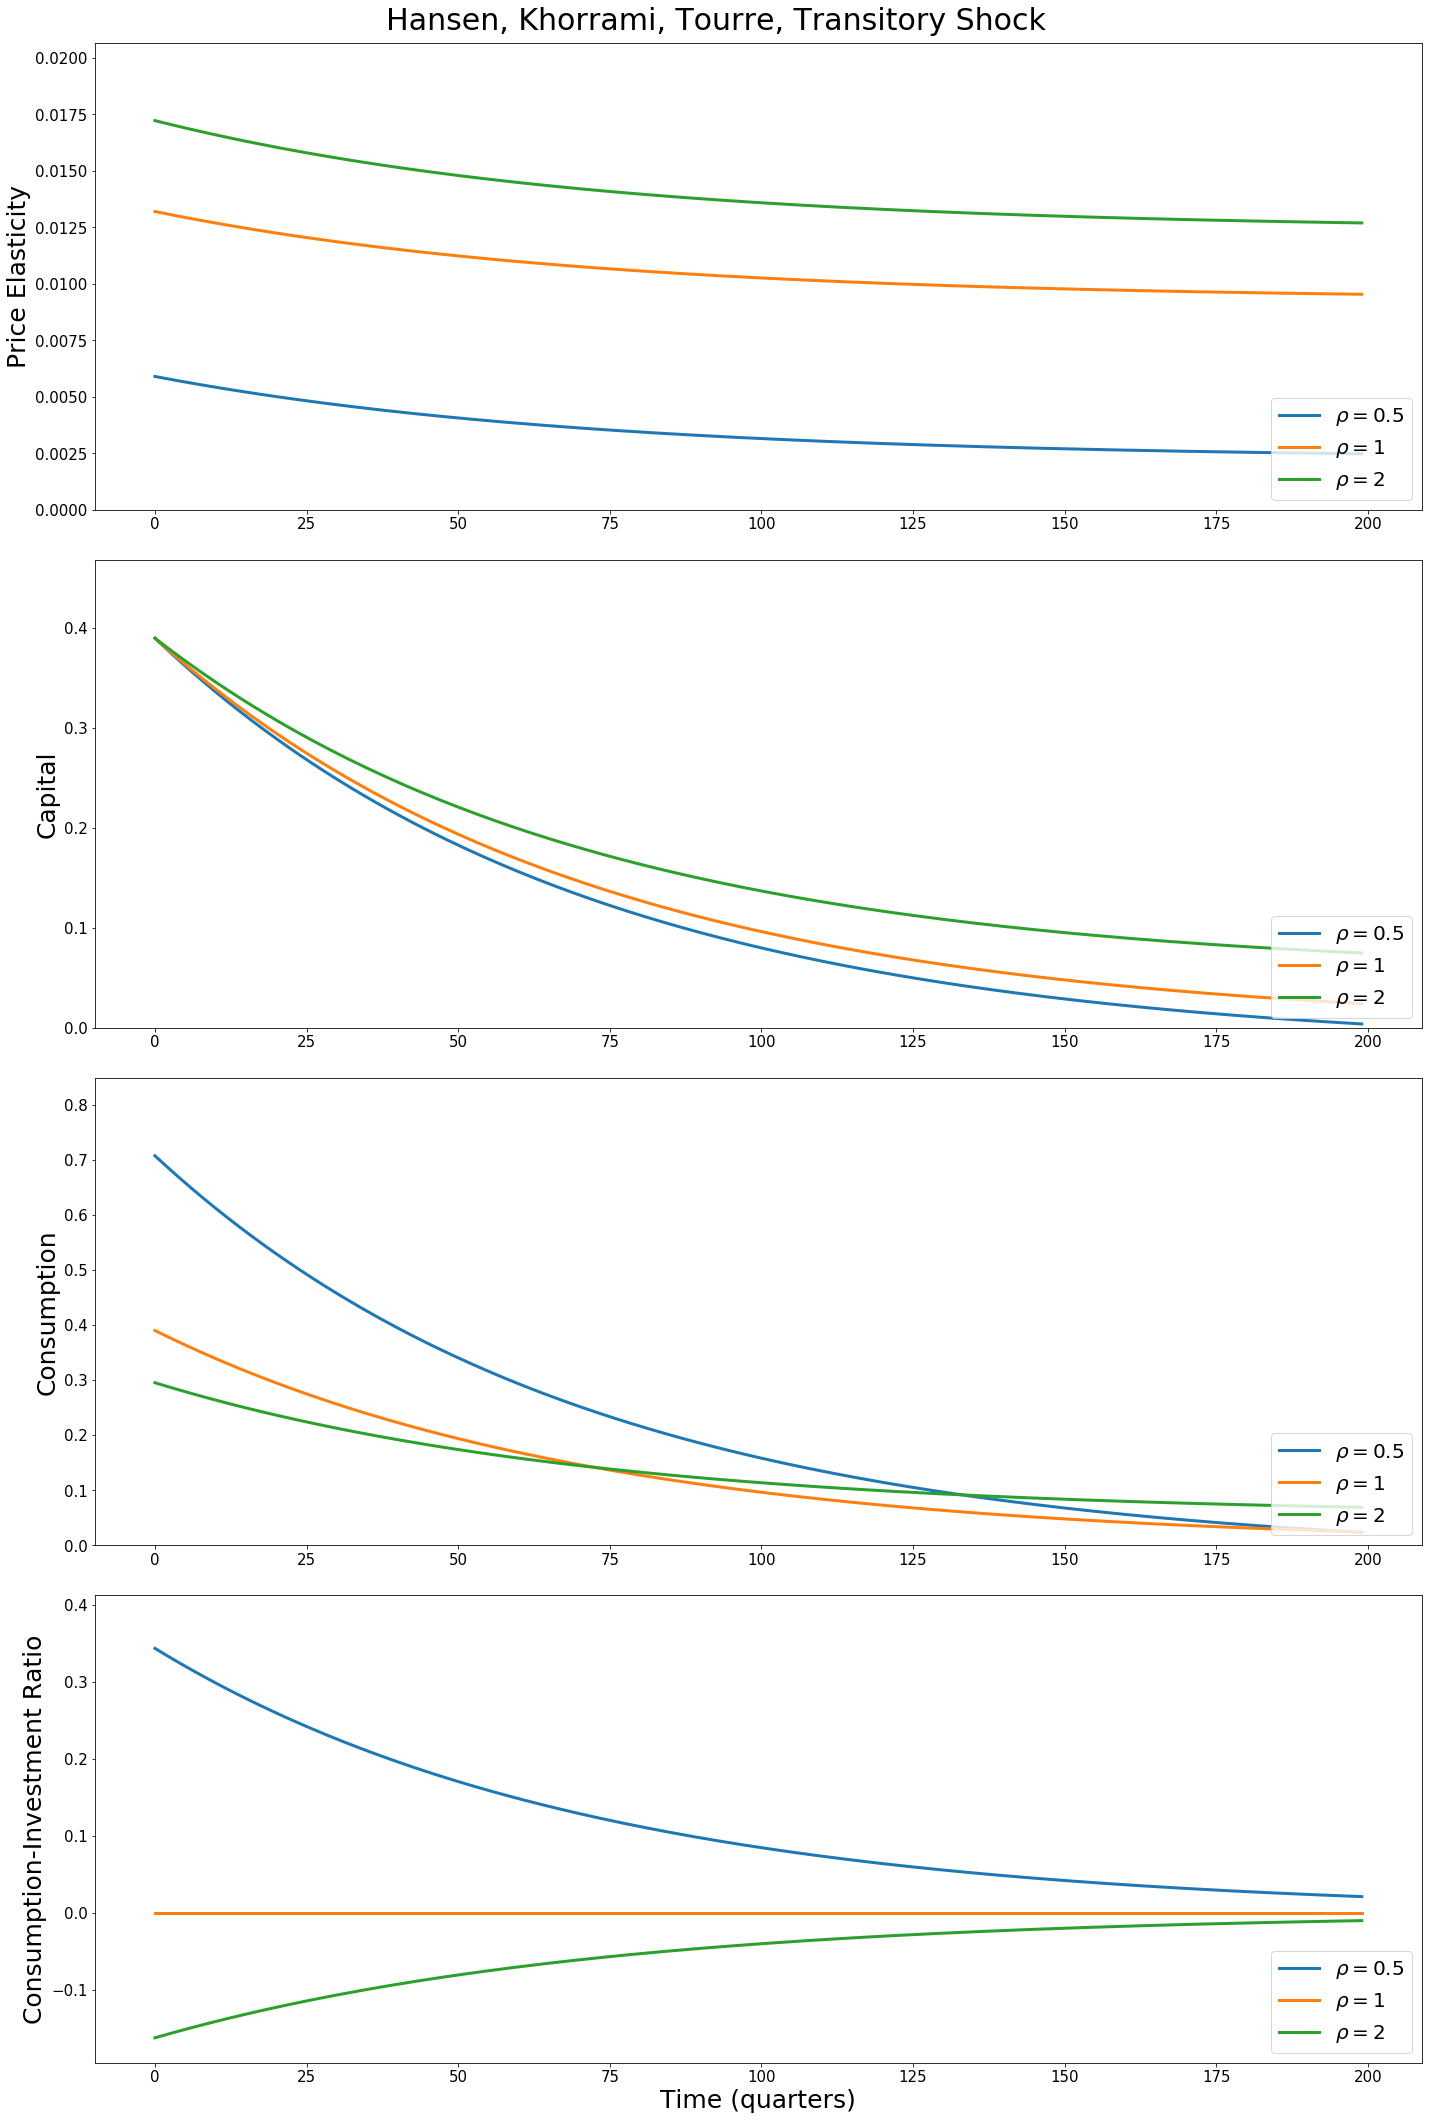

In [11]:
plot_impulse(ρs, γ, βz, T, shock = 2, empirical_method = 0, 
             transform_shocks = True, title = "Hansen, Khorrami, Tourre, Transitory Shock")

### Section 2.3.1: Third Calibration (Eberly and Wang) - Low Risk Aversion

Our calculations use the following quarterly parameter values:
\begin{align*}  
& \begin{matrix}
{ \mathbb{A}}  &= & 0.036 &  & { \phi_2} & = & 400.0 &  & { \beta_z} & = & 0.014  \cr
{ \alpha}_k  &= & 0.025 &  & { \phi_1} & = & 0.0125 &  & { \delta} & = & 0.005\end{matrix}
& \sigma =\begin{bmatrix}
(\sigma_k)' \cr (\sigma_z)' \end{bmatrix}  =    \begin{bmatrix} .477  & 0 \cr  .011 & .025 \end{bmatrix}
\end{align*}

The quantities computed with these numbers will be in percentage terms (100 times log differences).  

Use the order zero relations to pin down steady states:
\begin{align*} 
\exp( k^0) & = \left[ 1 + \phi_2 \left( {\mathbb A} - \exp \left( c^0 \right) \right) \right]^{\phi_1} \exp(  -\alpha_k )
\label{calibration1}  \\
\exp( v^0 (1 - \rho)) & = (1 - \exp(-\delta))\exp(c^0(1 - \rho)) - \exp(-\delta + (v^0 + k^0)(1 - \rho)) \\
\phi_1 \phi_2 \left[ 1 + \phi_2 \left( {\mathbb A} - \exp \left( c^0 \right) \right) \right]^{\phi_1} & = \exp(-\rho c^0 + (\rho - 1)(v^0 + k^0))(\exp(\delta)-1)\left[ 1 + \phi_2 \left( {\mathbb A} - \exp \left( c^0 \right) \right) \right]^{\phi_1}
\end{align*}


This set of parameters implies a quarterly growth rate of 0.48%. We consider $\rho = .5, 1, 2$.

In [12]:
# Define some reasonable parameter sets.
ρs = [.5, 1, 2]
γ = 1
βz = 0.014
T = 200

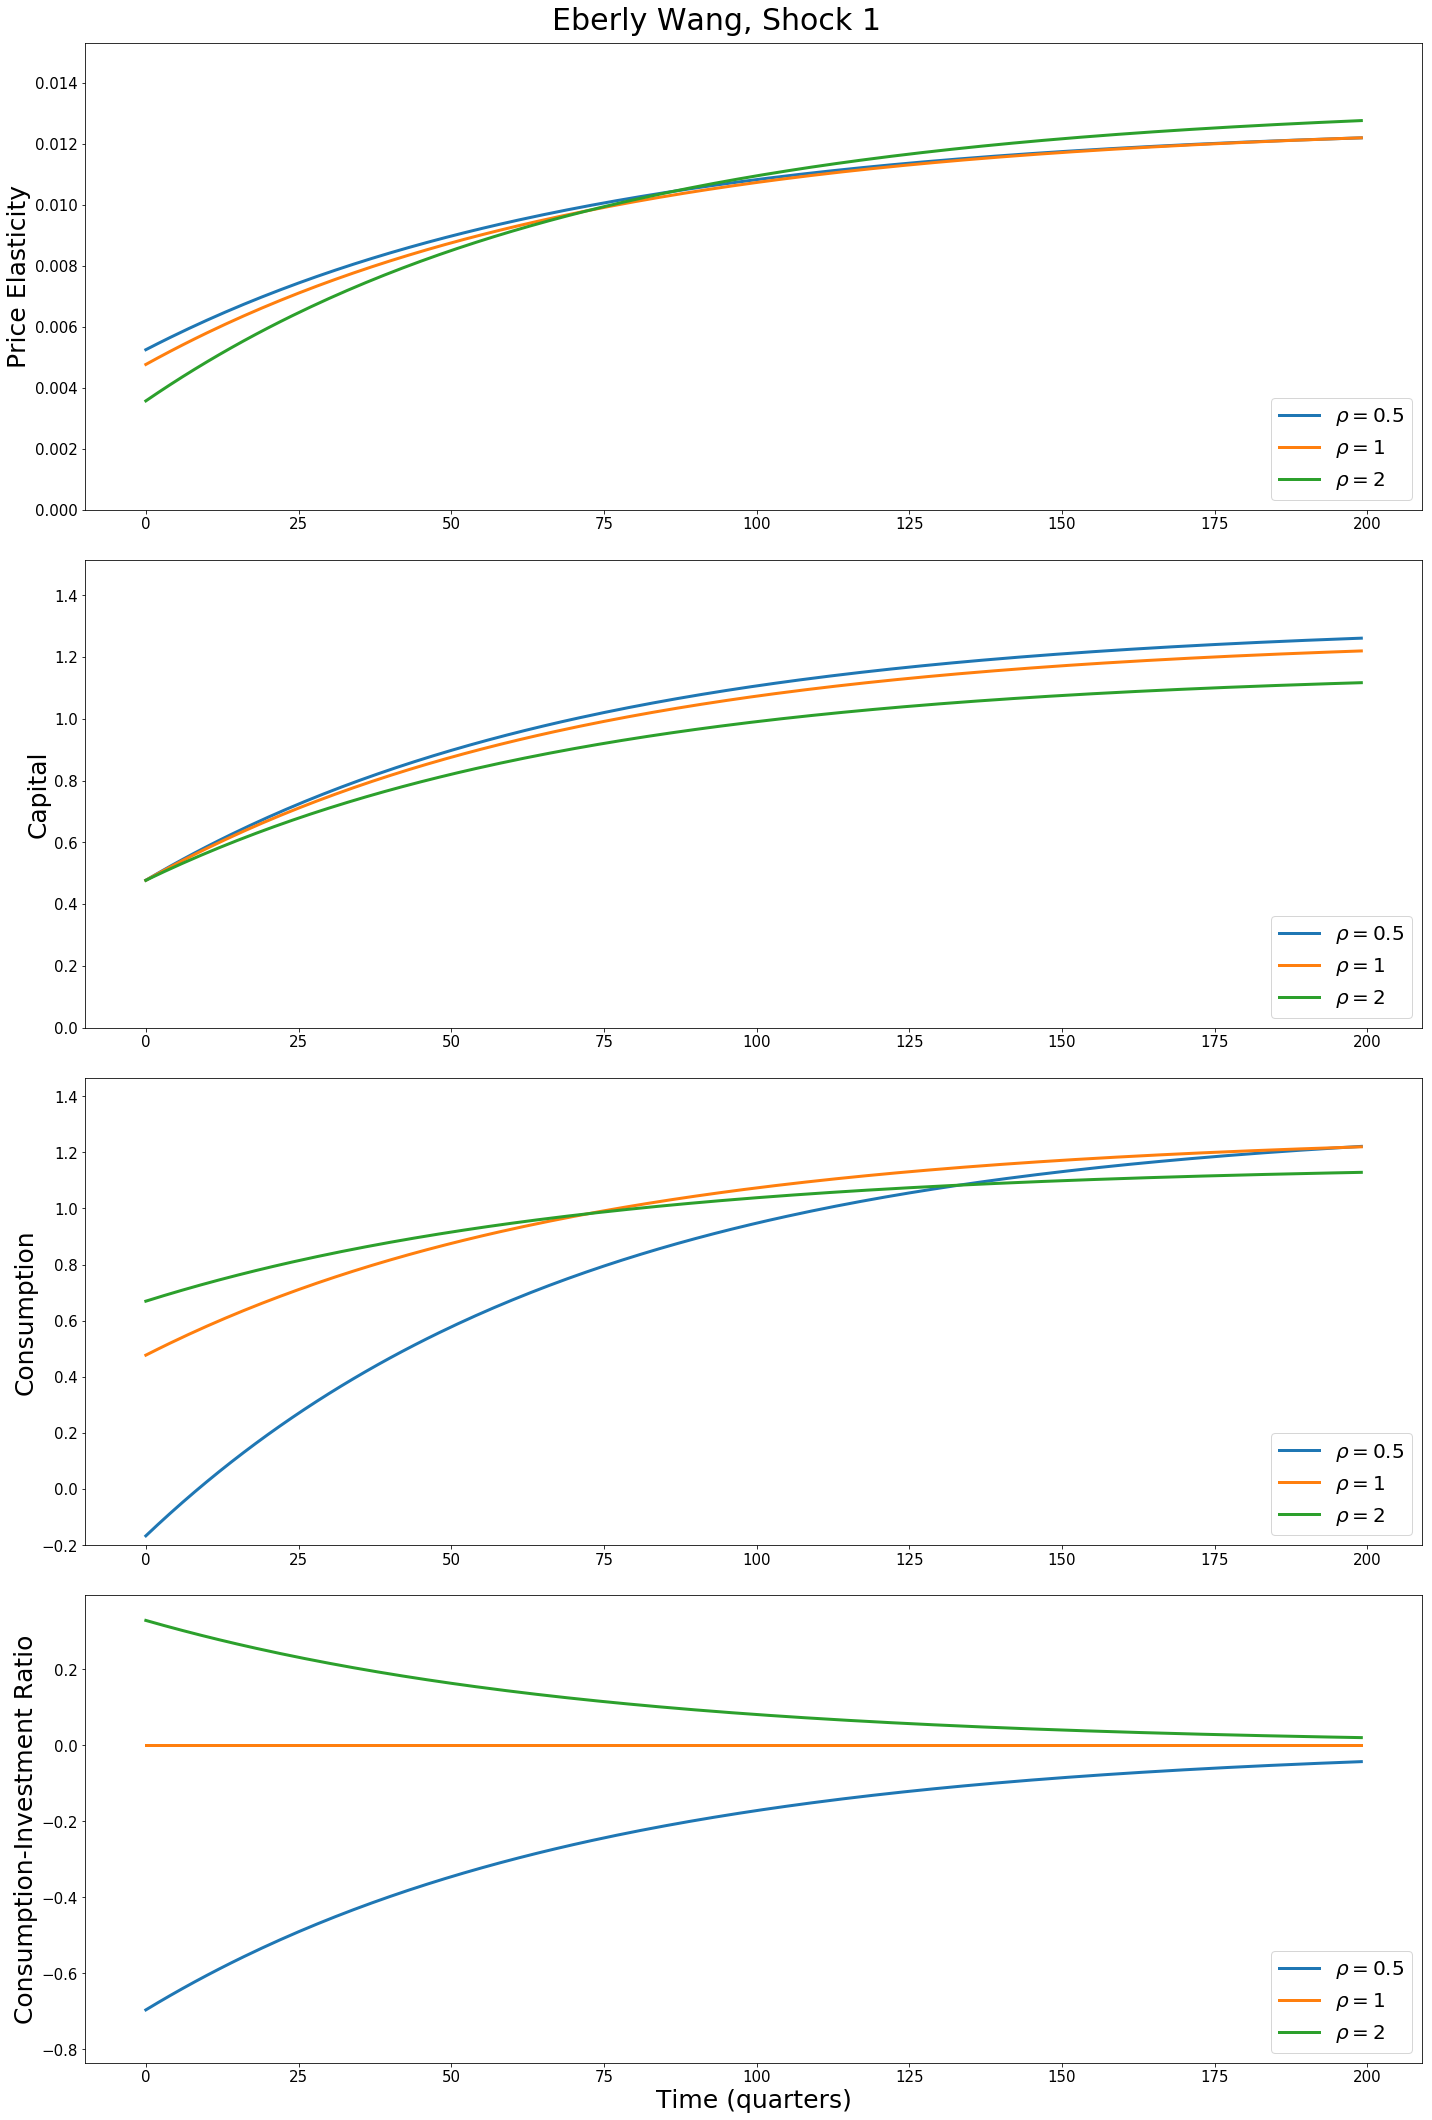

In [13]:
plot_impulse(ρs, γ, βz, T, shock = 1, empirical_method = 0, 
             transform_shocks = False, title = "Eberly Wang, Shock 1")

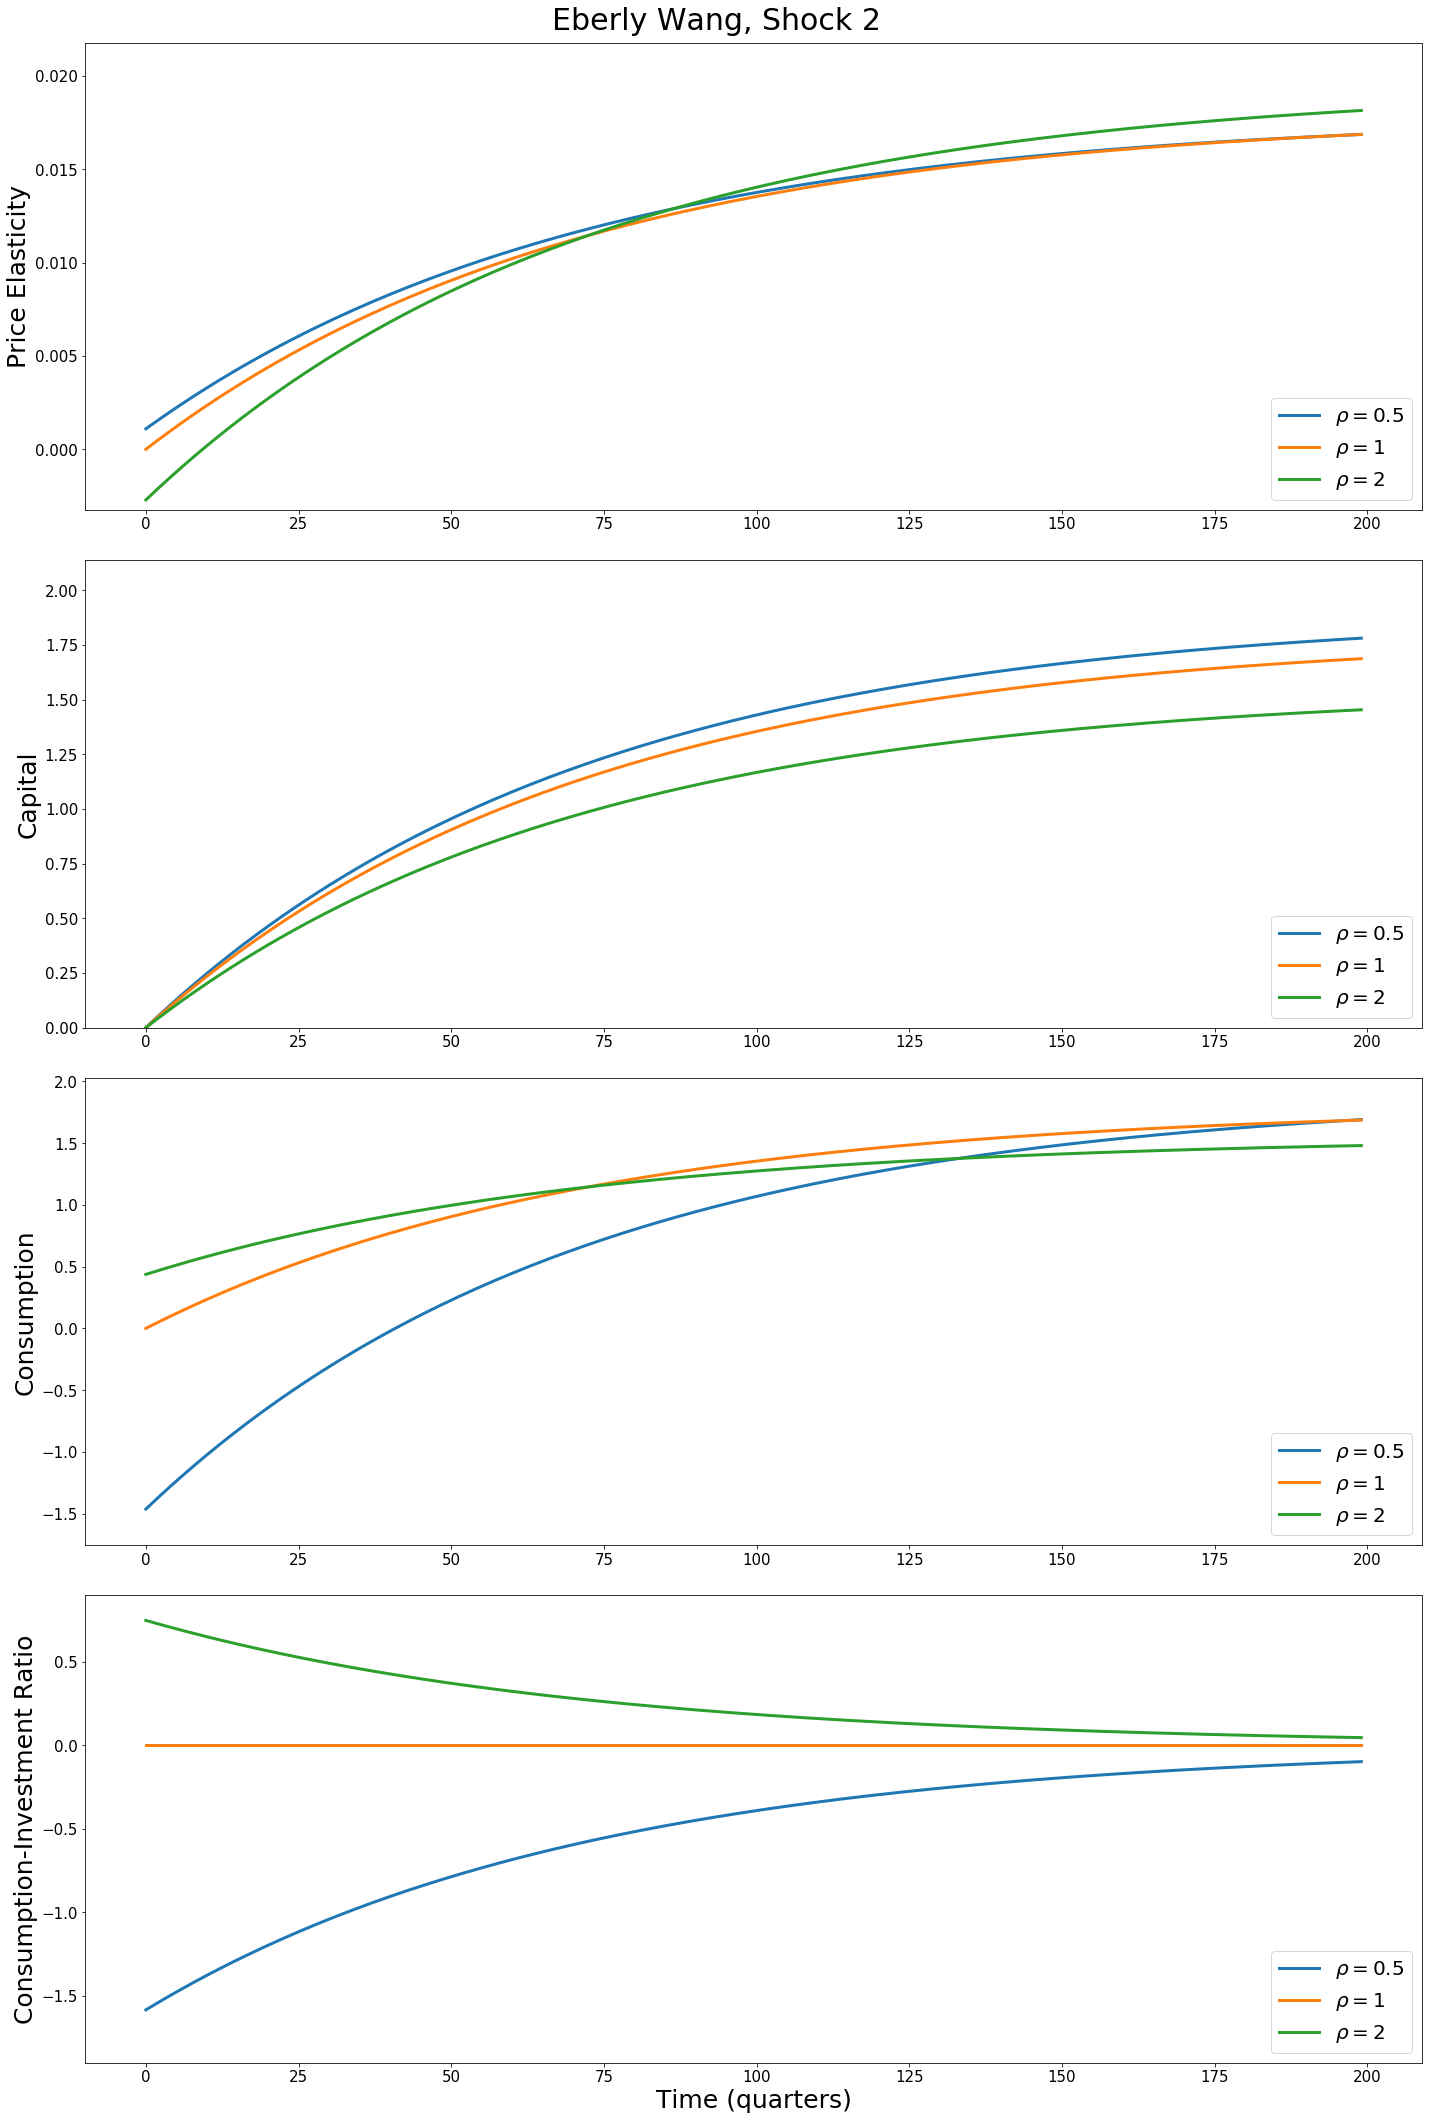

In [14]:
plot_impulse(ρs, γ, βz, T, shock = 2, empirical_method = 0, 
             transform_shocks = False, title = "Eberly Wang, Shock 2")

### Section 2.3.2: Permanent and Transitory Shocks

In the previous calculations, both shocks have permanent consequences.  We now repeat these same exercises with an observationally equivalent shock configuration for which the first shock is permanent and the second one is transitory under the $\rho = 1$ specification.  Recall that for $\rho=1$ the consumption-captial and investment capital ratios are constant.  To implement this, we alter $\sigma$ as following:


\begin{equation*}  
\sigma =\begin{bmatrix}
(\sigma_k)' \cr (\sigma_z)' \end{bmatrix}  =    \begin{bmatrix} .289  & .379 \cr  .027 & - .0064 \end{bmatrix}
\end{equation*}



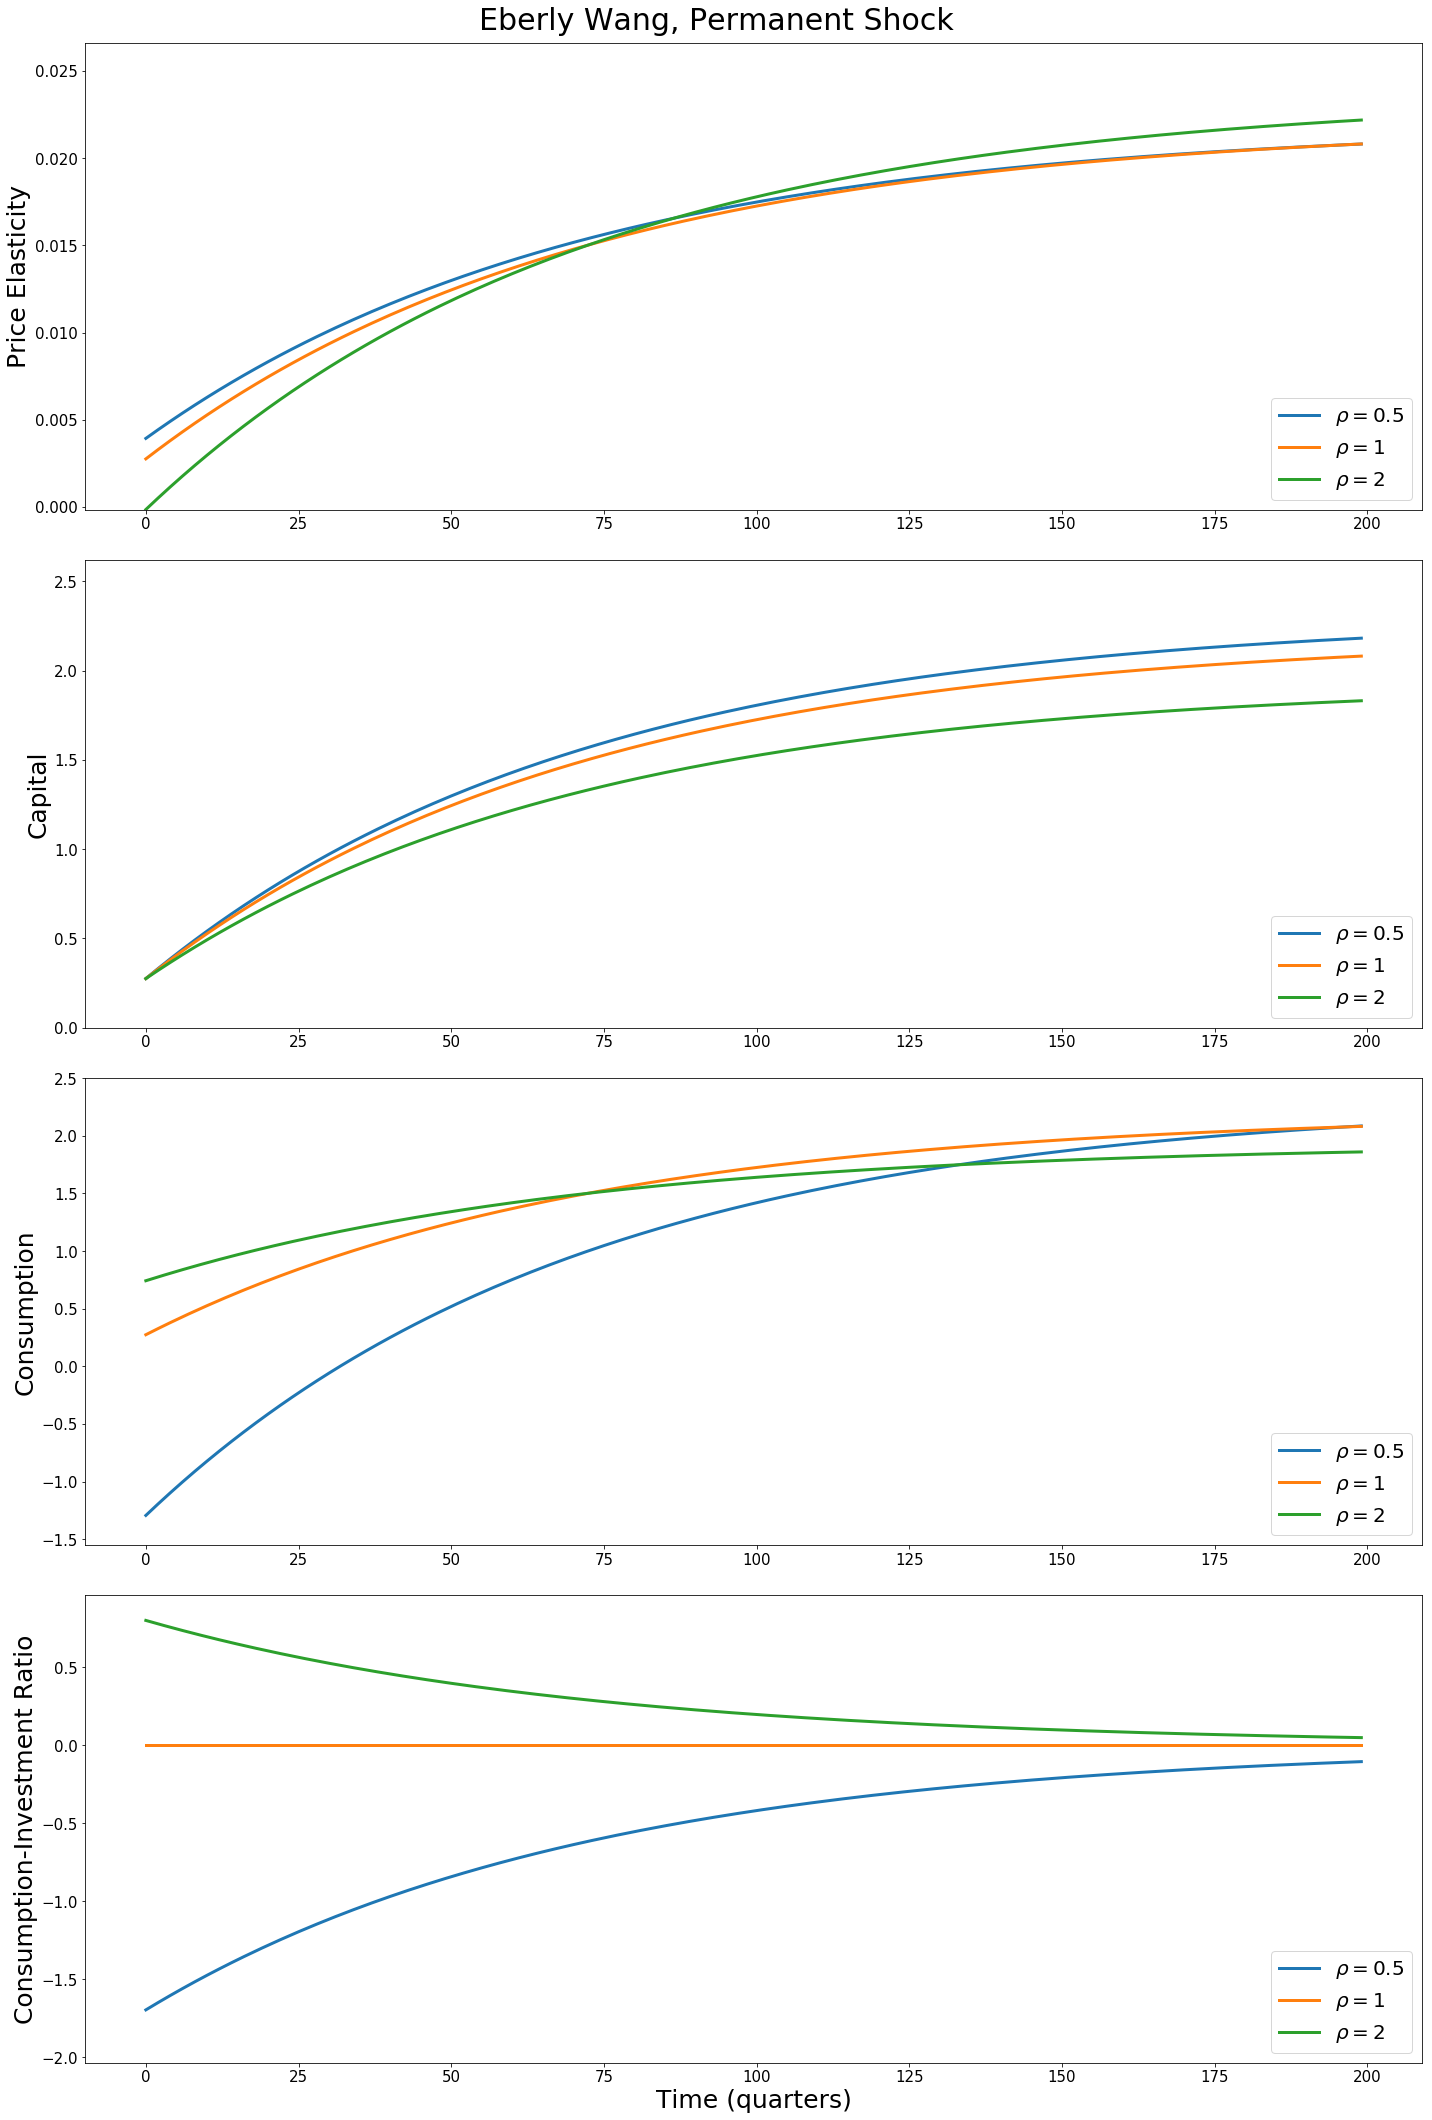

In [15]:
plot_impulse(ρs, γ, βz, T, shock = 1, empirical_method = 0, 
             transform_shocks = True, title = "Eberly Wang, Permanent Shock")

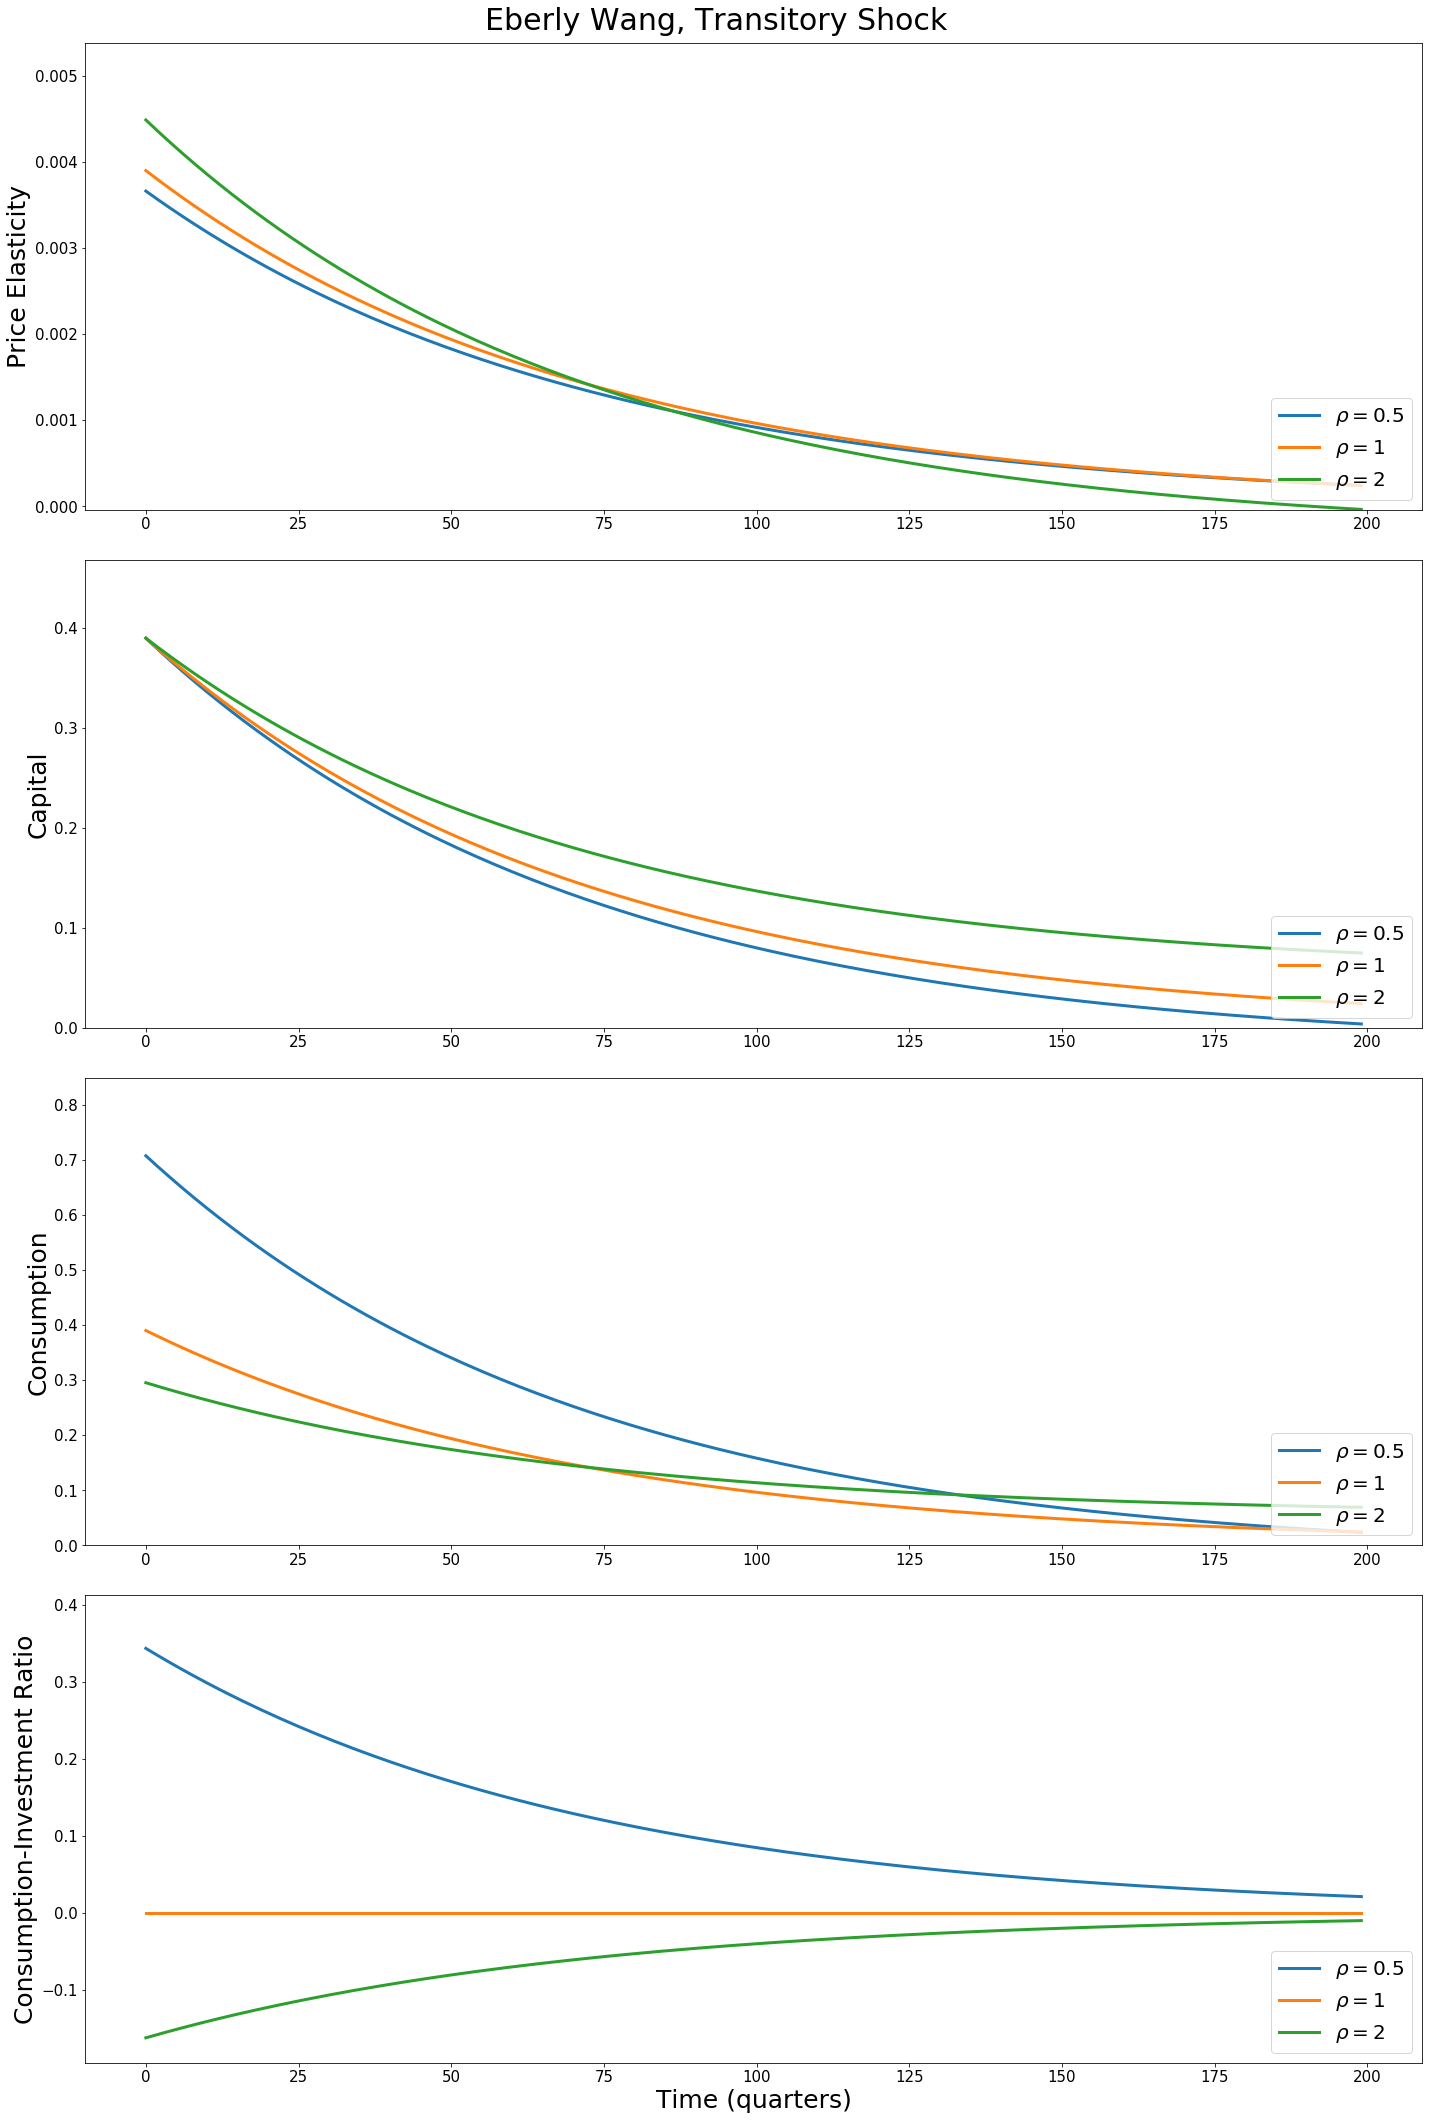

In [16]:
plot_impulse(ρs, γ, βz, T, shock = 2, empirical_method = 0, 
             transform_shocks = True, title = "Eberly Wang, Transitory Shock")

### Section 2.4.1: Second Calibration (Hansen, Khorrami, Tourre) - Low Risk Aversion

Our calculations use the following quarterly parameter values:
\begin{align*}  
& \begin{matrix}
{ \mathbb{A}}  &= & 0.035 &  & { \phi_2} & = & 12.0 &  & { \beta_z} & = & 0.014  \cr
{ \alpha}_k  &= & 0.0125 &  & { \phi_1} & = & \frac{1}{12} &  & { \delta} & = & 0.0125\end{matrix}
& \sigma =\begin{bmatrix}
(\sigma_k)' \cr (\sigma_z)' \end{bmatrix}  =    \begin{bmatrix} .477  & 0 \cr  .011 & .025 \end{bmatrix}
\end{align*}

The quantities computed with these numbers will be in percentage terms (100 times log differences).  

Use the order zero relations to pin down steady states:
\begin{align*} 
\exp( k^0) & = \left[ 1 + \phi_2 \left( {\mathbb A} - \exp \left( c^0 \right) \right) \right]^{\phi_1} \exp(  -\alpha_k )
\label{calibration1}  \\
\exp( v^0 (1 - \rho)) & = (1 - \exp(-\delta))\exp(c^0(1 - \rho)) - \exp(-\delta + (v^0 + k^0)(1 - \rho)) \\
\phi_1 \phi_2 \left[ 1 + \phi_2 \left( {\mathbb A} - \exp \left( c^0 \right) \right) \right]^{\phi_1} & = \exp(-\rho c^0 + (\rho - 1)(v^0 + k^0))(\exp(\delta)-1)\left[ 1 + \phi_2 \left( {\mathbb A} - \exp \left( c^0 \right) \right) \right]^{\phi_1}
\end{align*}


This set of parameters implies a quarterly growth rate of 0.5%. We consider $\rho = .5, 1, 2$.

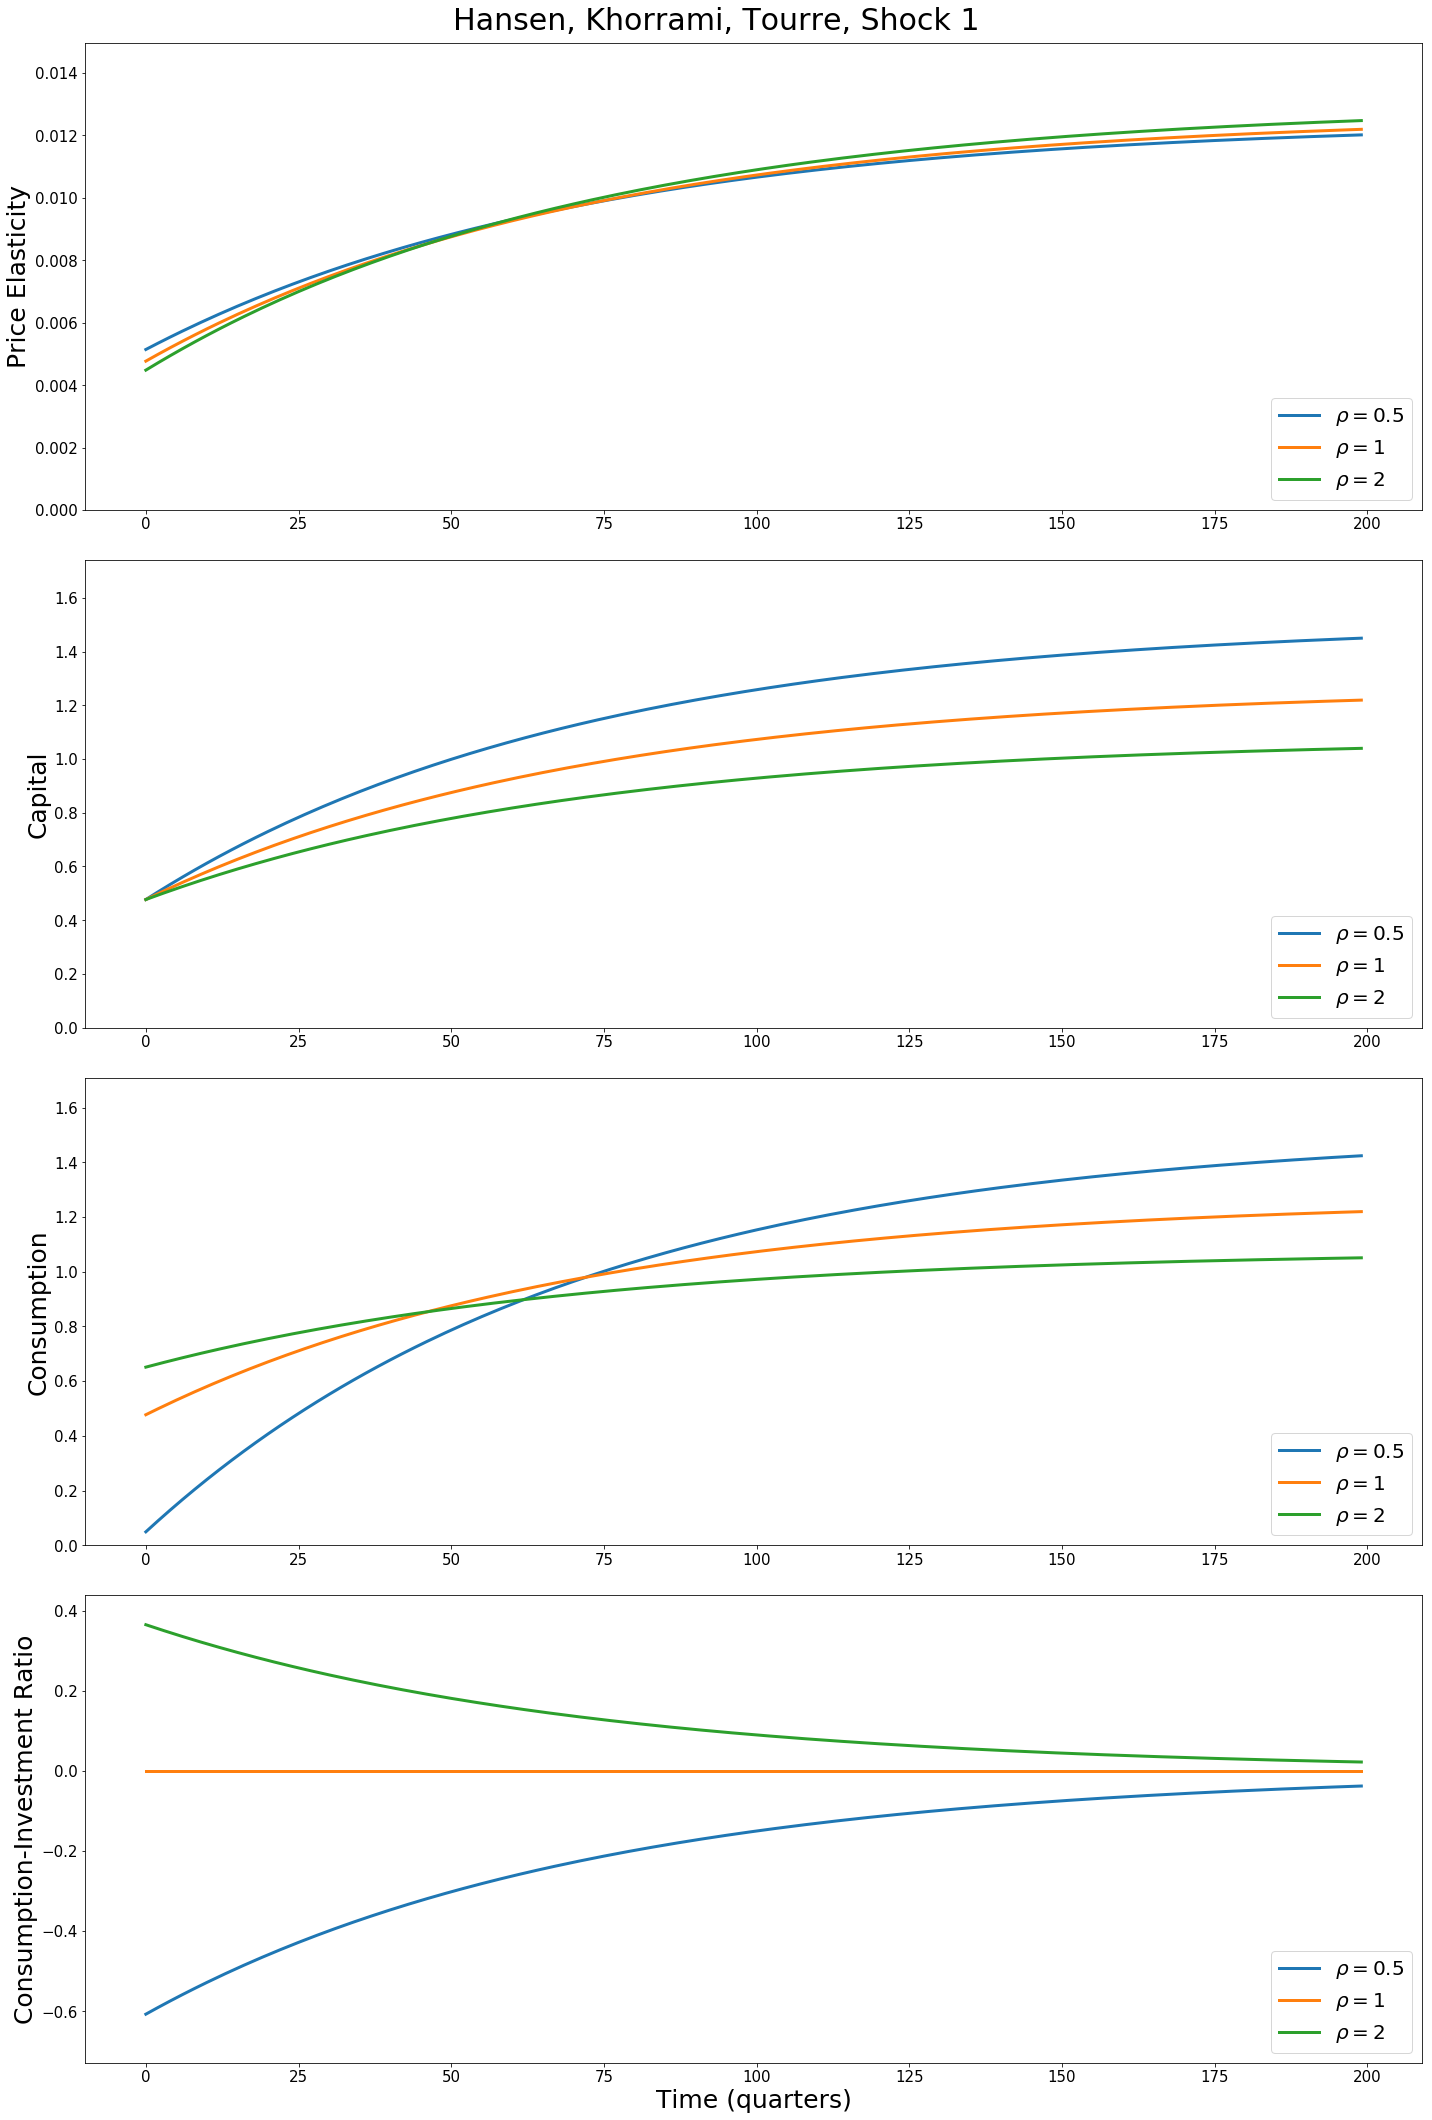

In [17]:
plot_impulse(ρs, γ, βz, T, shock = 1, empirical_method = 0.5, 
             transform_shocks = False, title = "Hansen, Khorrami, Tourre, Shock 1")

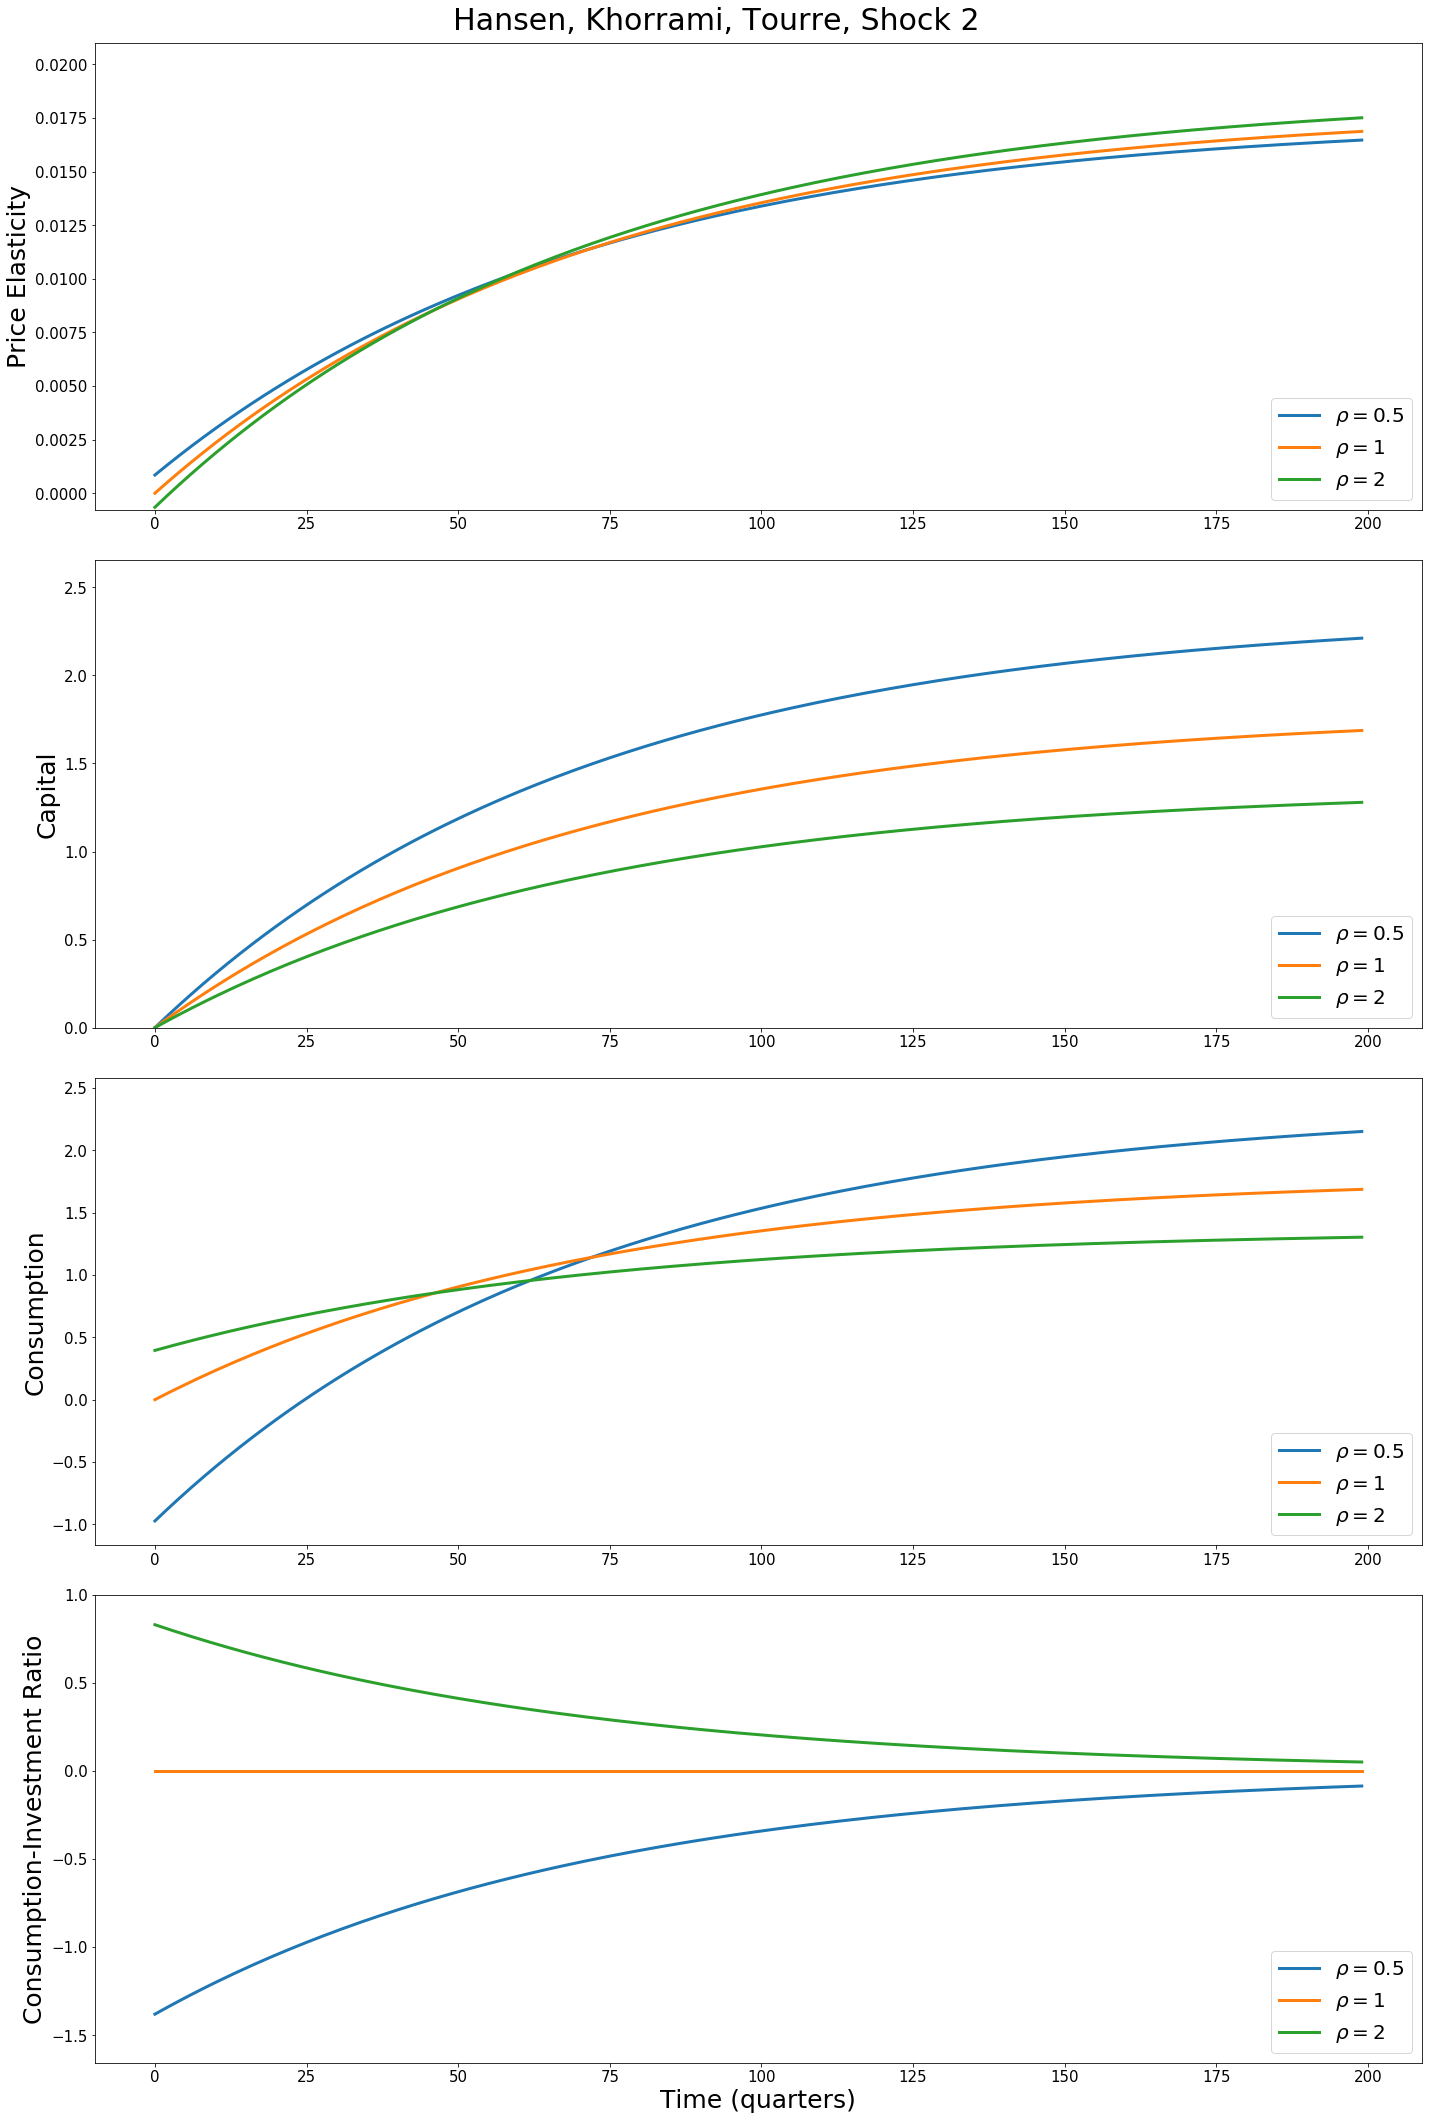

In [18]:
plot_impulse(ρs, γ, βz, T, shock = 2, empirical_method = 0.5, 
             transform_shocks = False, title = "Hansen, Khorrami, Tourre, Shock 2")

### Section 2.4.2: Permanent and Transitory Shocks

In the previous calculations, both shocks have permanent consequences.  We now repeat these same exercises with an observationally equivalent shock configuration for which the first shock is permanent and the second one is transitory under the $\rho = 1$ specification.  Recall that for $\rho=1$ the consumption-captial and investment capital ratios are constant.  To implement this, we alter $\sigma$ as following:


\begin{equation*}  
\sigma =\begin{bmatrix}
(\sigma_k)' \cr (\sigma_z)' \end{bmatrix}  =    \begin{bmatrix} .289  & .379 \cr  .027 & - .0064 \end{bmatrix}
\end{equation*}



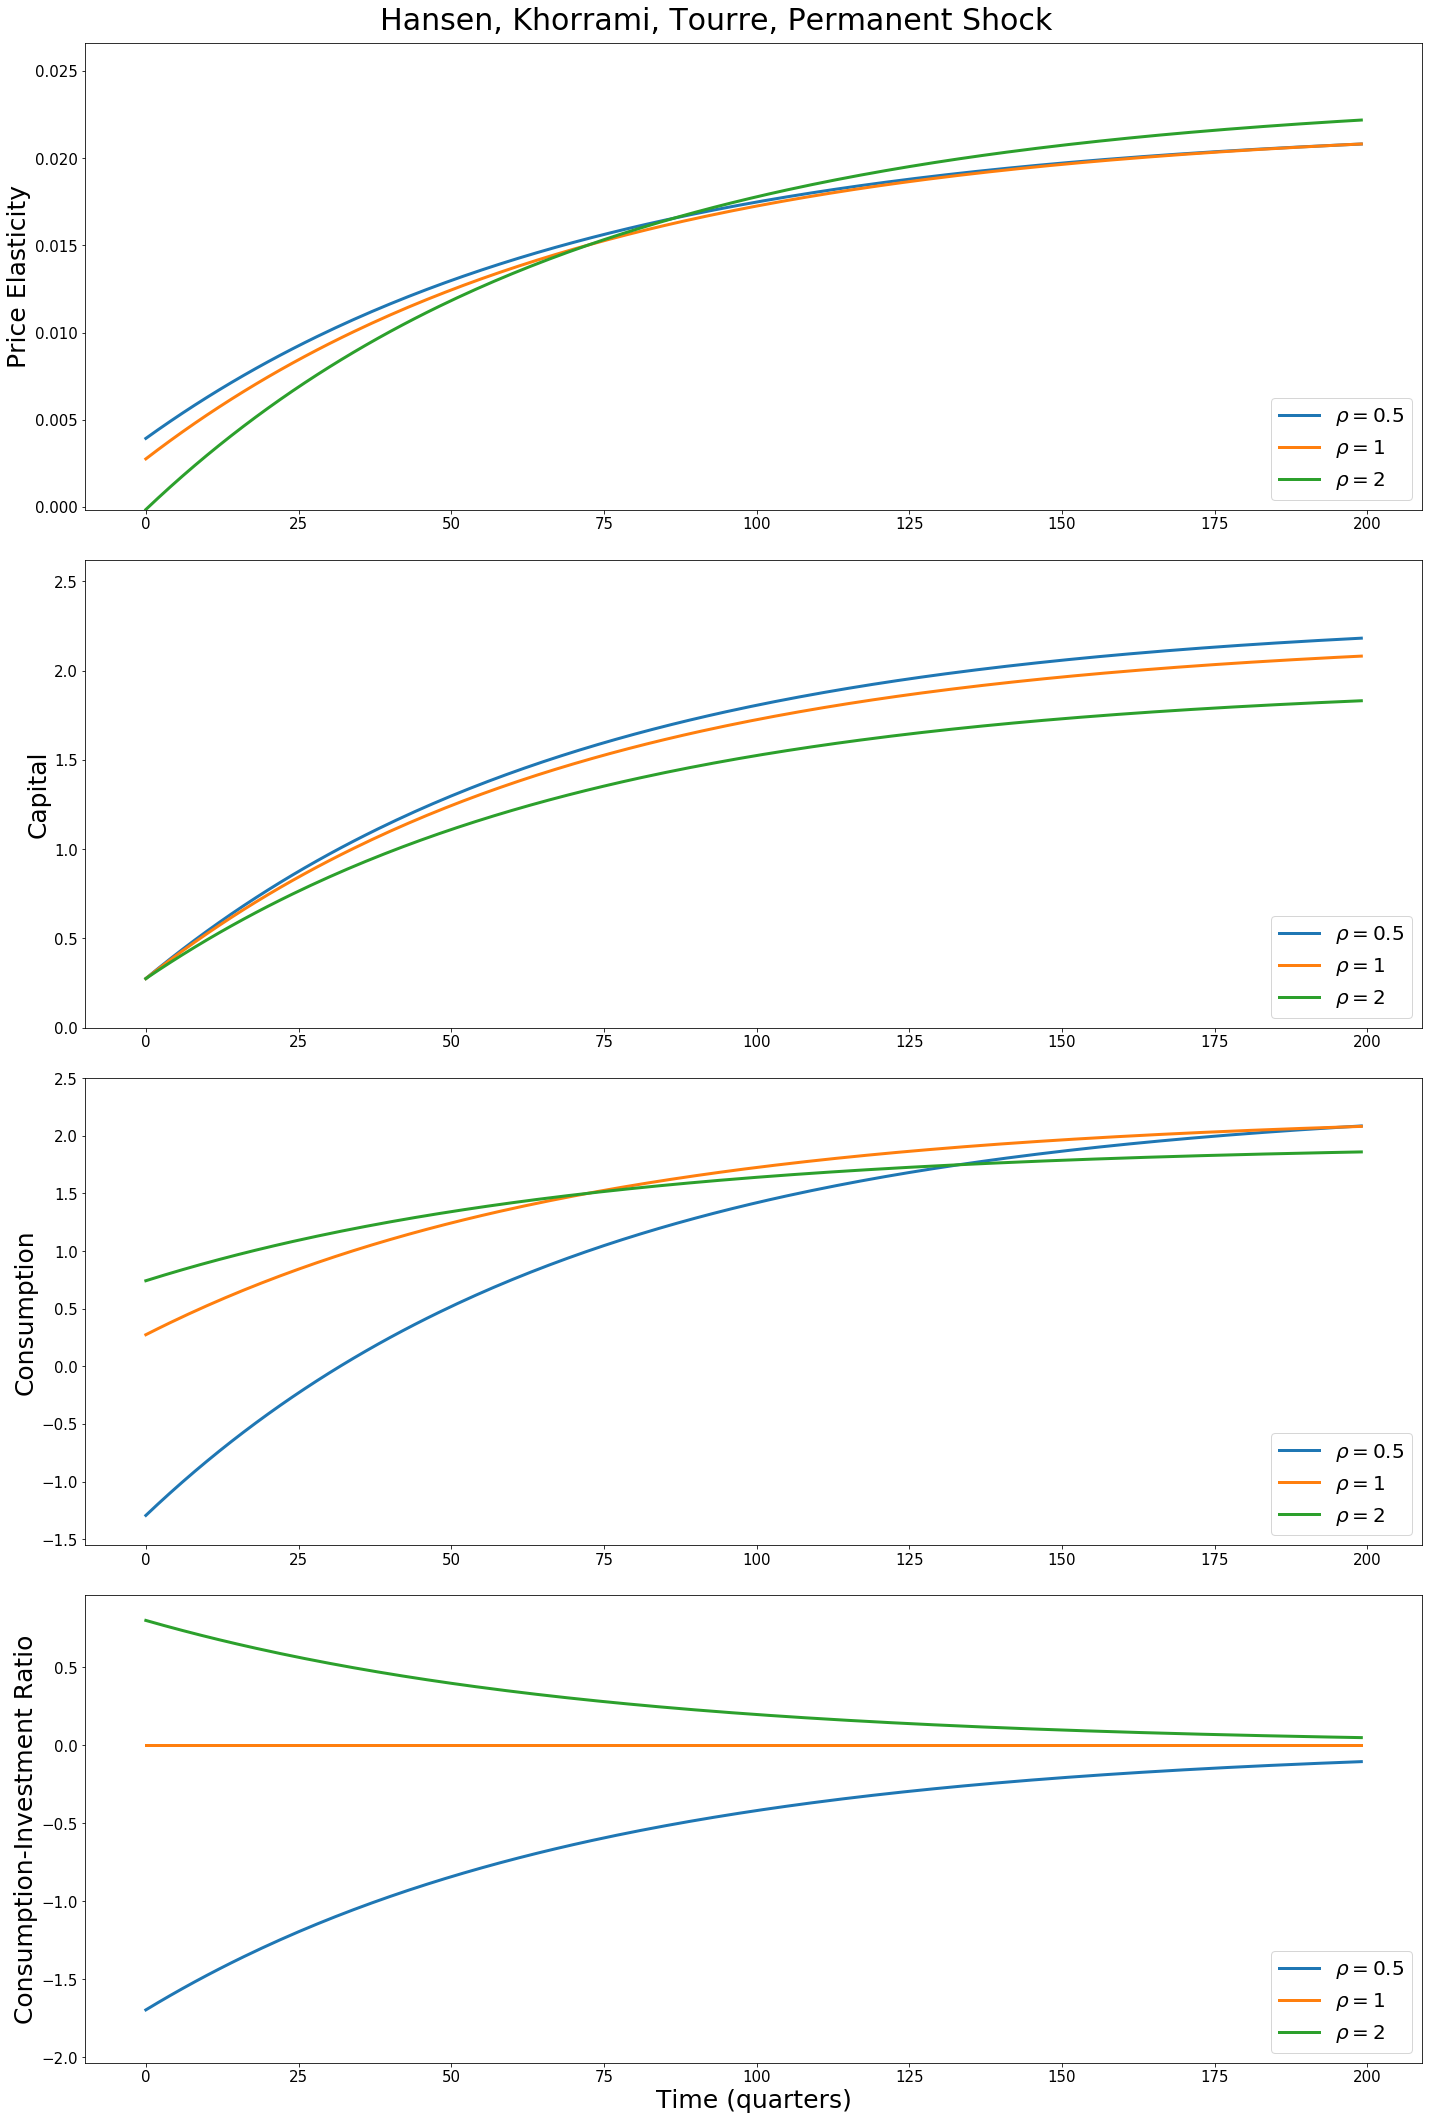

In [19]:
plot_impulse(ρs, γ, βz, T, shock = 1, empirical_method = 0, 
             transform_shocks = True, title = "Hansen, Khorrami, Tourre, Permanent Shock")

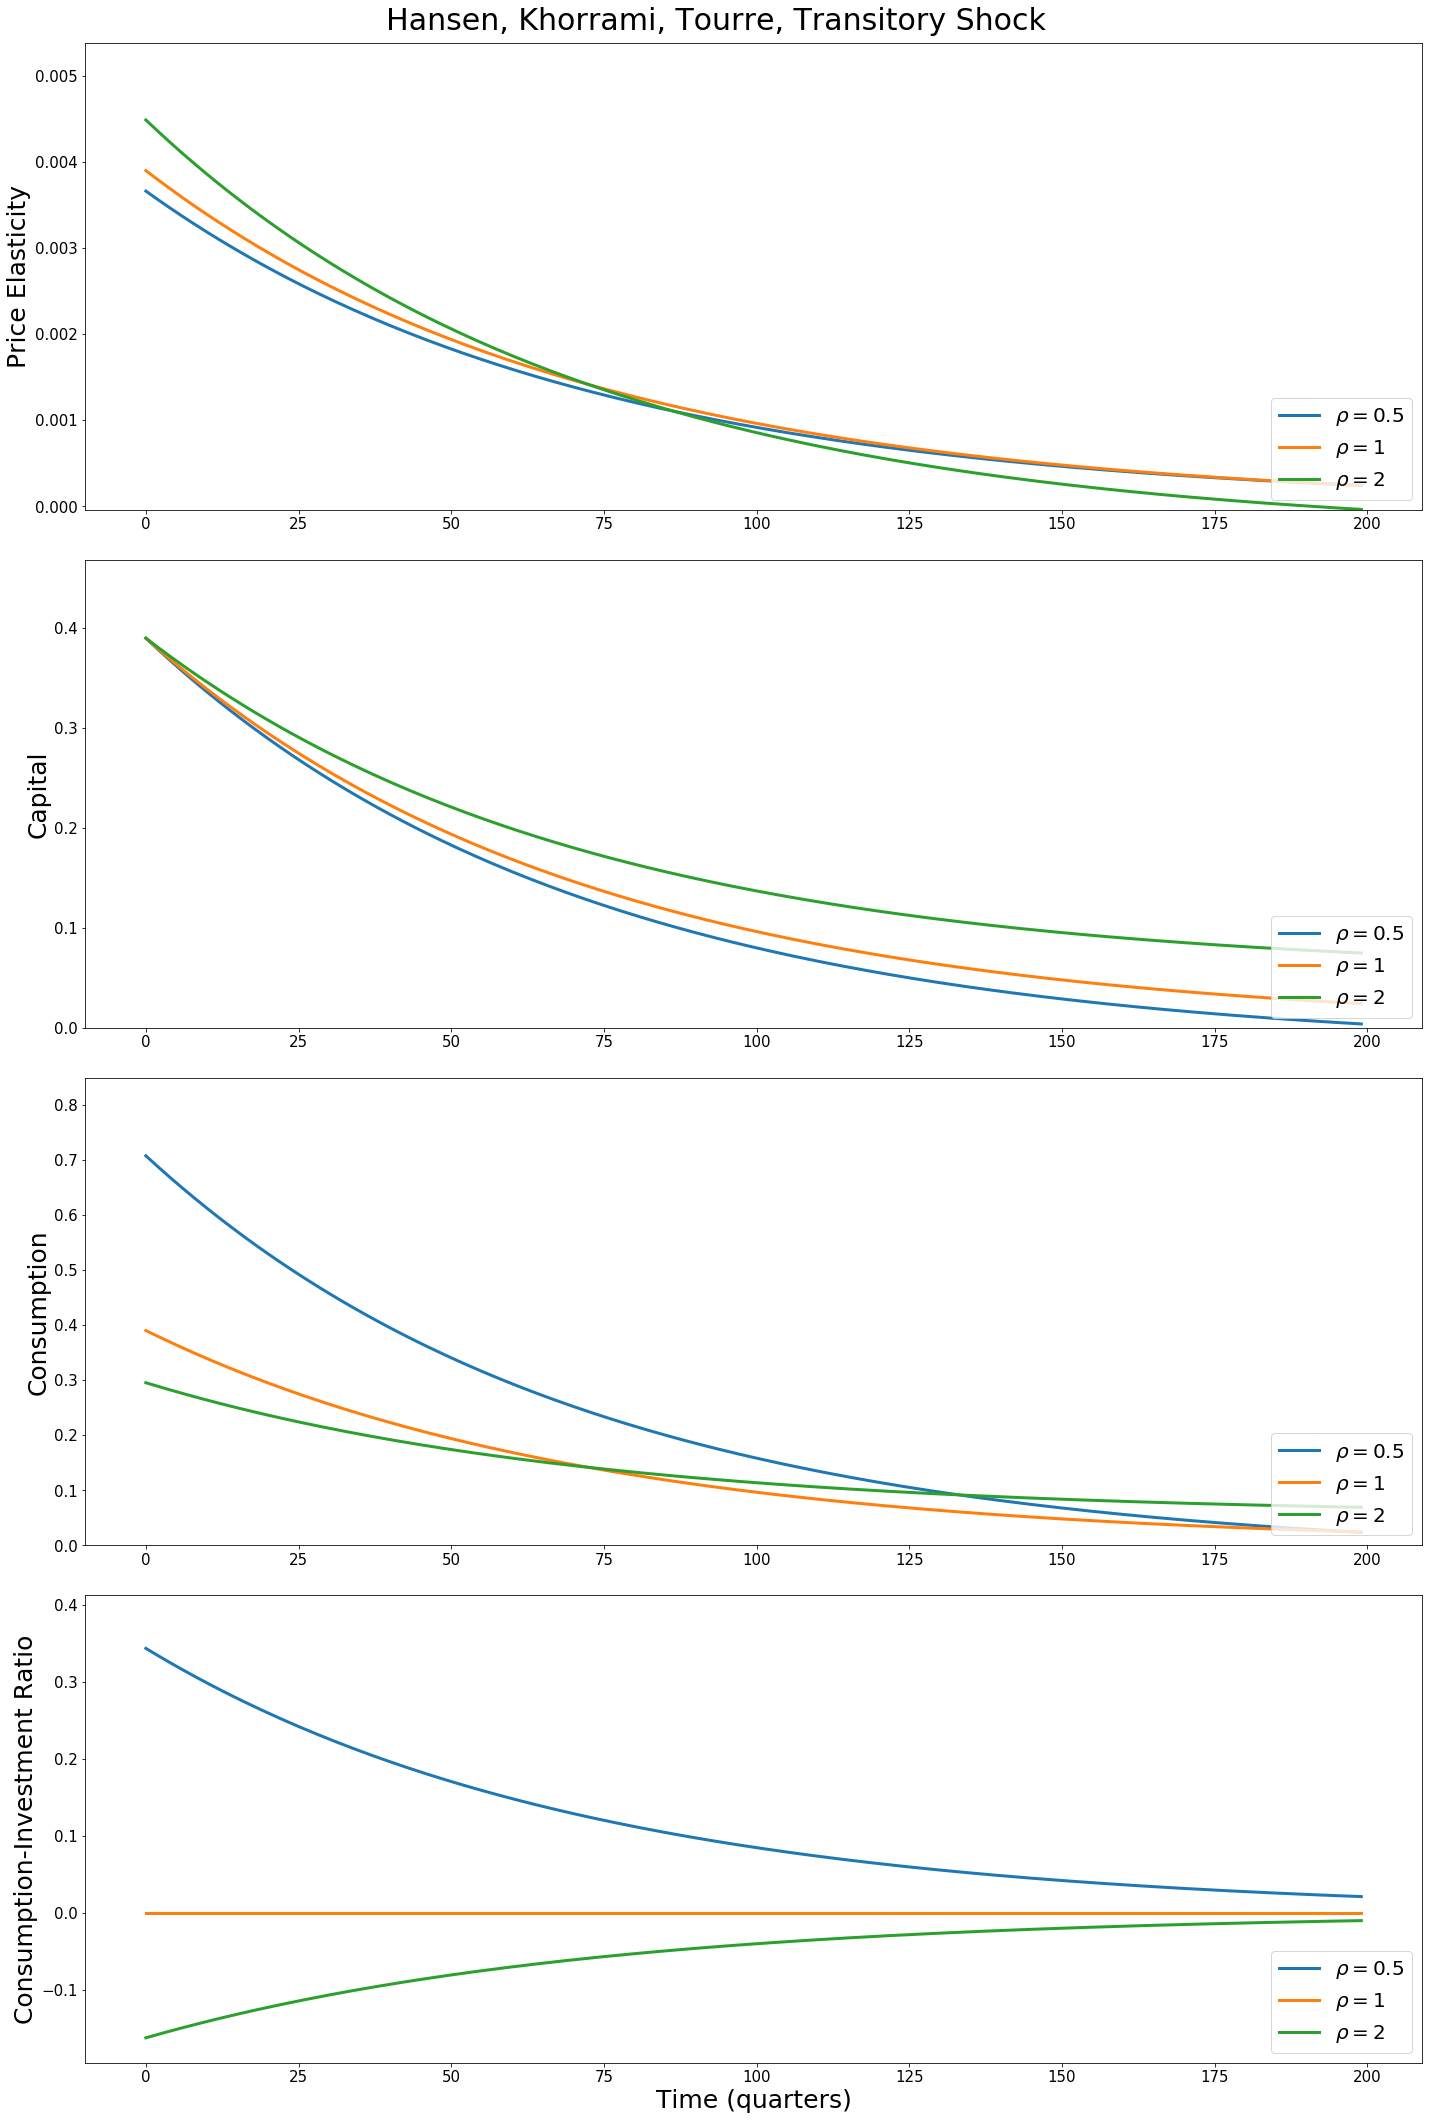

In [20]:
plot_impulse(ρs, γ, βz, T, shock = 2, empirical_method = 0, 
             transform_shocks = True, title = "Hansen, Khorrami, Tourre, Transitory Shock")

## References

Eberly, Janice, and Neng Wang. 2009. "Capital Reallocation and Growth." American Economic Review, 99 (2): 560-66.